In [1]:
# import
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from scipy import signal
from importlib import reload

#import winsound as sd
import pickle
import sys
import os

from Tools.tools import *
from Plasticity.plasticity import *
from Neuron.neuron import *
from Model.model import *
from Analysis.analysis import *
import Operate_model_v3

In [3]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)
    
with open(path+'//Data_final.pkl', 'rb') as file:
    # 453개의 data에 해당하는 input vector, DG vector, DG vector size, 
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    # CA3 vector index, CA3i vector index
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    # 뭐였더라
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [5]:
class config:
    def __init__(self, pc):
        # The number of neurons
        self.N_I = 16
        self.N_O = self.N_I

        self.N_DG = 800
        self.N_DGH = self.N_I
        self.N_DGM = 100 
        self.N_DGB = 400 

        self.N_CA3 = pc[3] 
        self.N_CA1 = 200
        self.N_CA3i = pc[4] 
        
        # Weights of each connection
        # From EC
        self.w_EI = 3
        self.w_ppDG = 2 
        self.w_ppCA3 = 1 
        self.w_ppCA1 = 0.5 

        # DG
        self.w_IH = 3 
        self.w_IB = 4 
        self.w_IM = 3 
        self.w_HM = 4 
        self.w_MB = 4 
        self.w_BDG = 3 

        # CA3
        self.w_mf = 2 
        self.w_mfi = 2 
        self.w_Rc = 1

        self.w_CA33i = 1
        self.w_3iCA3 = 2 
        self.w_3i3i = 0.5 
        self.w_NoCA3 = 0.5

        # CA1
        self.w_Sc = 0.15
        self.w_CA1O = 2 

        # The number of connections 
        # From EC
        self.c_ppDG = 1
        self.c_ppCA3 = 8
        self.c_ppCA1 = 3

        # DG
        self.c_IH = 1
        self.c_IB = self.N_I
        self.c_IM = self.N_I*2//3
        self.c_HM = 1
        self.c_MB = self.N_I
        self.c_BDG = 1

        # CA3
        self.c_mf = pc[0]
        self.c_mfi = pc[1]
        self.c_Rc = self.N_CA3//4

        self.c_CA33i = self.N_CA3i//4
        self.c_3iCA3 = pc[2]
        self.c_3i3i = pc[5]
        self.c_NoCA3 = self.N_CA3
        self.c_Sc =  self.N_CA3//2

        # Parameters for delay
        self.d_I = 10
        self.d_O = 15
        self.d_DG = 3
        self.d_CA3 = 5
        self.d_CA3i = 1

In [6]:
# init
pc = [30,3,600,2400,120,20]
already_learned = False
learned_weights = [0,0,0,0]
params = config(pc)

In [11]:
# Neuron indices want to see the specific values
WTS_I = []
WTS_DGH = []
WTS_DGM = []
WTS_DGB = []
WTS_DG = []
WTS_CA3 = []
WTS_CA3i = []
WTS_CA1 = []
WTS = [WTS_I, WTS_DGH, WTS_DGM, WTS_DGB, WTS_DG, WTS_CA3, WTS_CA3i, WTS_CA1]

In [12]:
# Overlap 조사
with open('Data_Overlap\Cue_and_Target_Overlap_Set4.pkl', 'rb') as file:
    Target_Data = pickle.load(file)
    Cue_Data = pickle.load(file)
    
learned_path = path+'//module//Weights_Overlap'

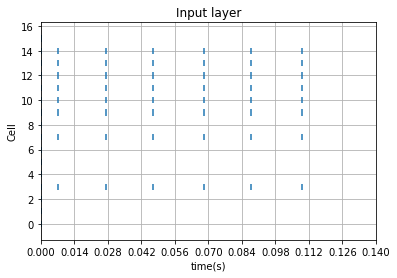

0 :  [ 3  7  9 10 11 12 13 14]
1 :  [ 0  3  4  5  7  9 14]


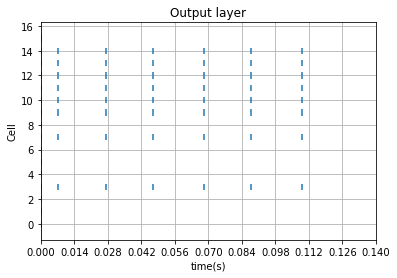

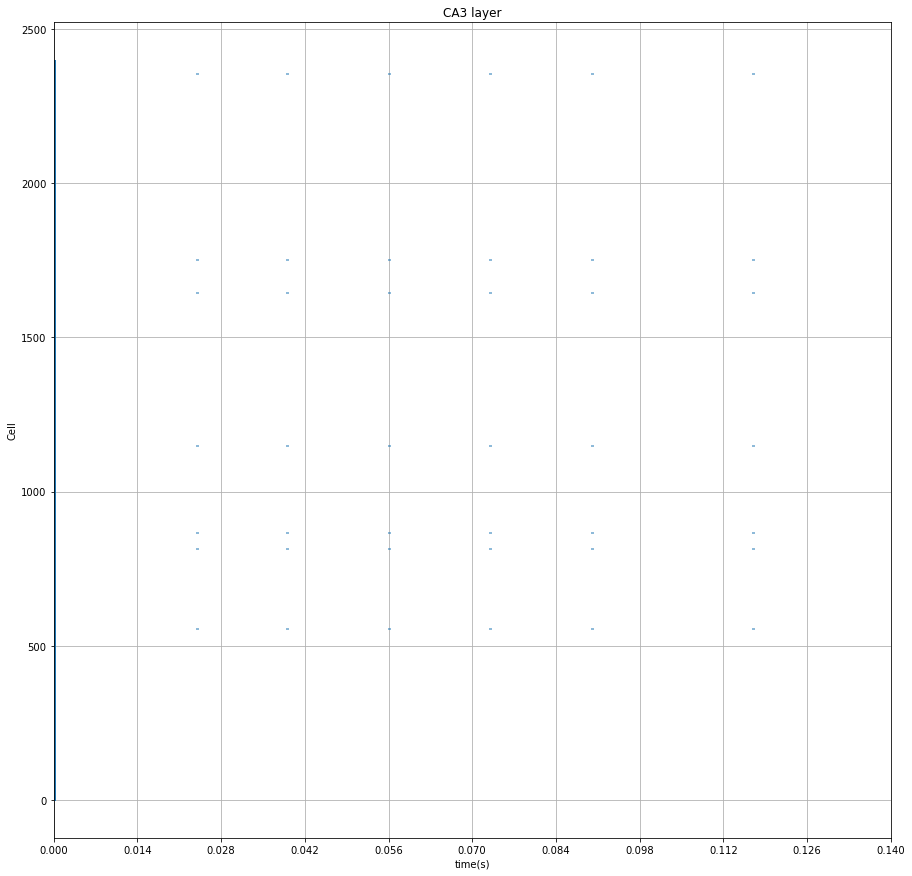

0 :  [1150, 557, 815, 2355, 1753, 2010, 867, 1770, 1646]
1 :  [2305, 1537, 1596, 1371, 2156, 125, 673, 686, 473, 1770]


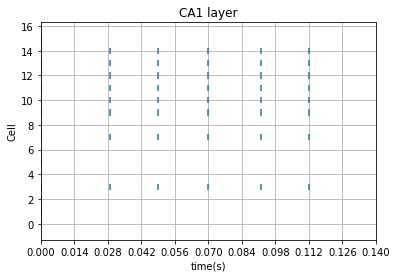

Ret1 :  {867, 1770, 557, 1646, 815, 2355, 1753, 2010, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


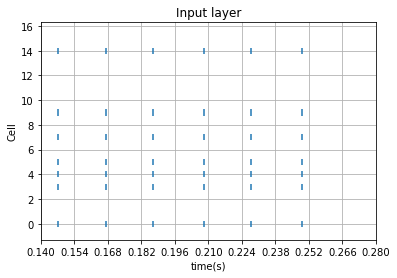

0 :  [ 3  7  9 10 11 12 13 14]
1 :  [ 0  3  4  5  7  9 14]


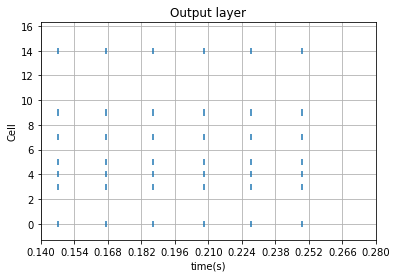

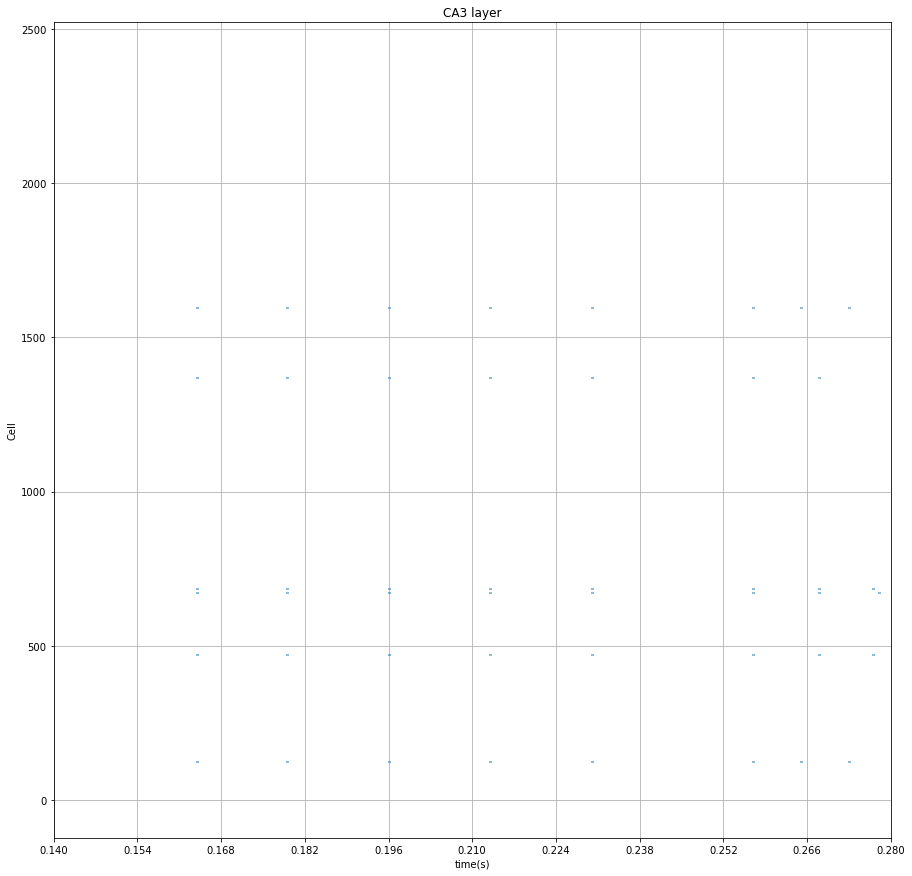

0 :  [1150, 557, 815, 2355, 1753, 2010, 867, 1770, 1646]
1 :  [2305, 1537, 1596, 1371, 2156, 125, 673, 686, 473, 1770]


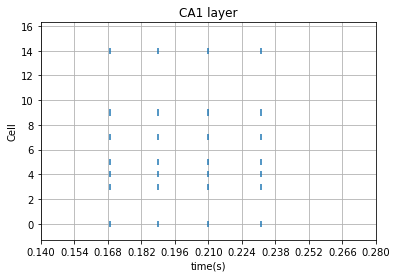

Ret1 :  {673, 1537, 2305, 1770, 2156, 686, 473, 1371, 1596, 125}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1770}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 123 [473]


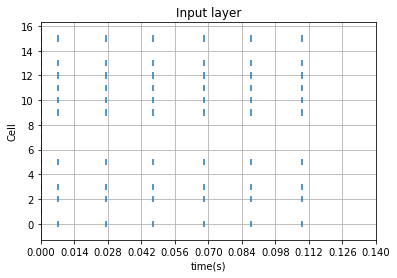

0 :  [ 0  2  3  5  9 10 11 12 13 15]
1 :  [ 0  3  4  5  7  9 14]


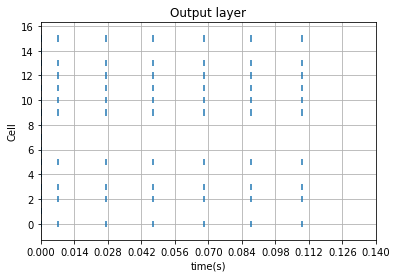

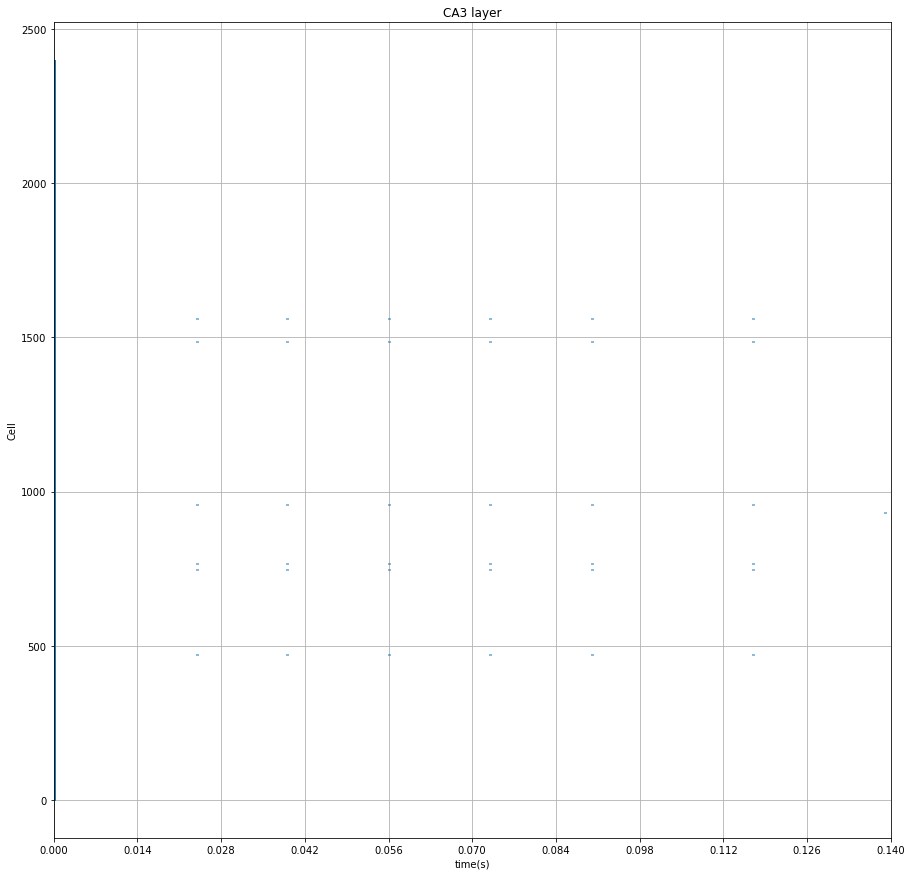

0 :  [0, 1561, 959, 1487, 473, 2140, 1767, 748, 767]
1 :  [2305, 1537, 1596, 1371, 2156, 125, 673, 686, 473, 1770]


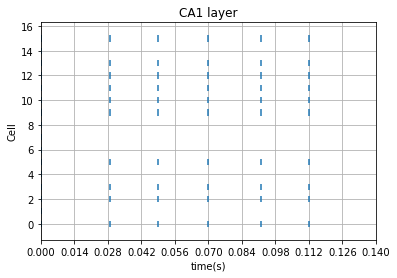

Ret1 :  {0, 932, 1767, 748, 1561, 1487, 473, 2140, 959, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


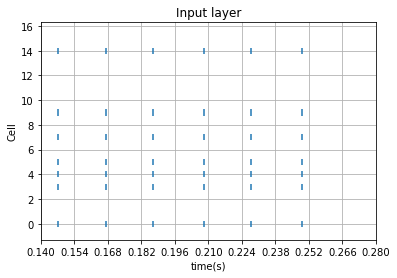

0 :  [ 0  2  3  5  9 10 11 12 13 15]
1 :  [ 0  3  4  5  7  9 14]


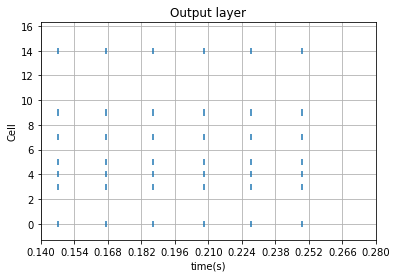

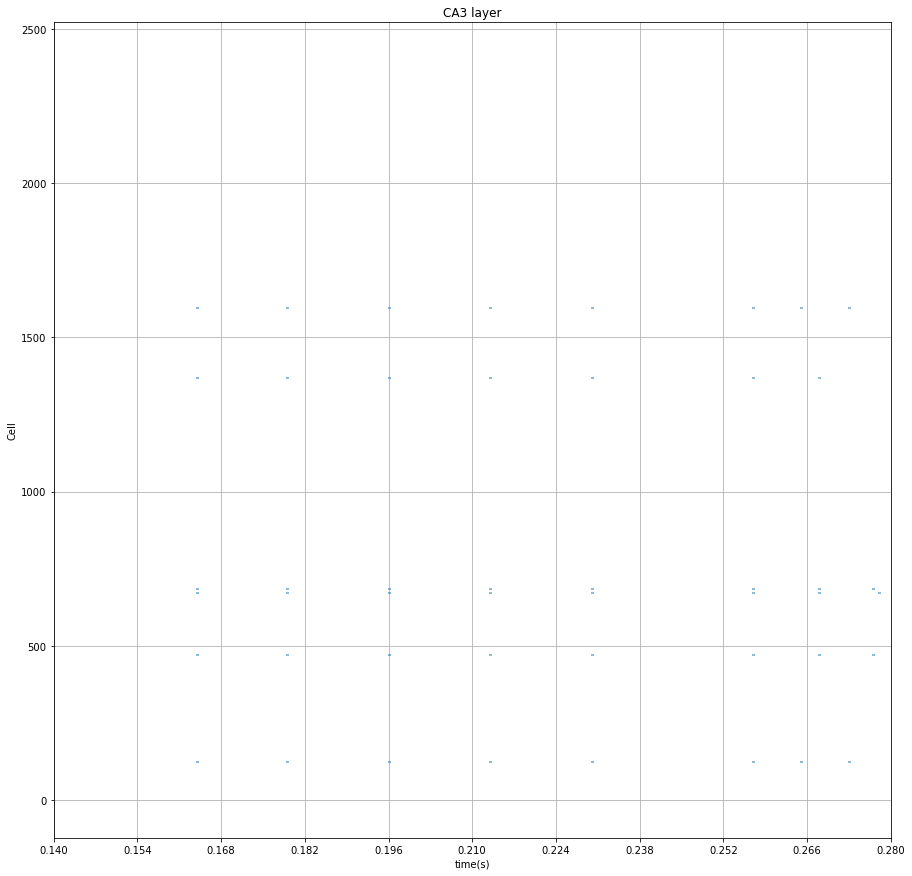

0 :  [0, 1561, 959, 1487, 473, 2140, 1767, 748, 767]
1 :  [2305, 1537, 1596, 1371, 2156, 125, 673, 686, 473, 1770]


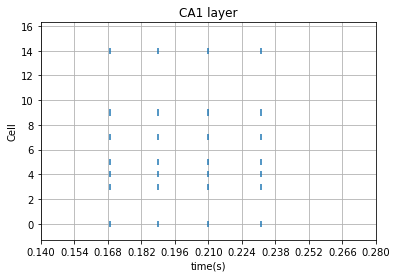

Ret1 :  {673, 1537, 2305, 1770, 2156, 686, 473, 1371, 1596, 125}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {473}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


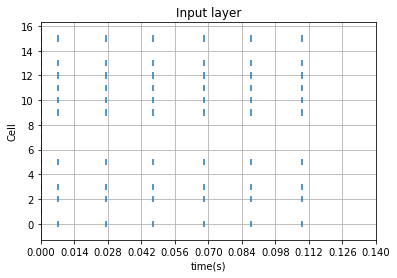

0 :  [ 0  2  3  5  9 10 11 12 13 15]
1 :  [ 1  2  4  5  6  9 10 11 13]


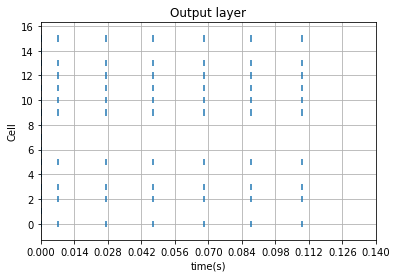

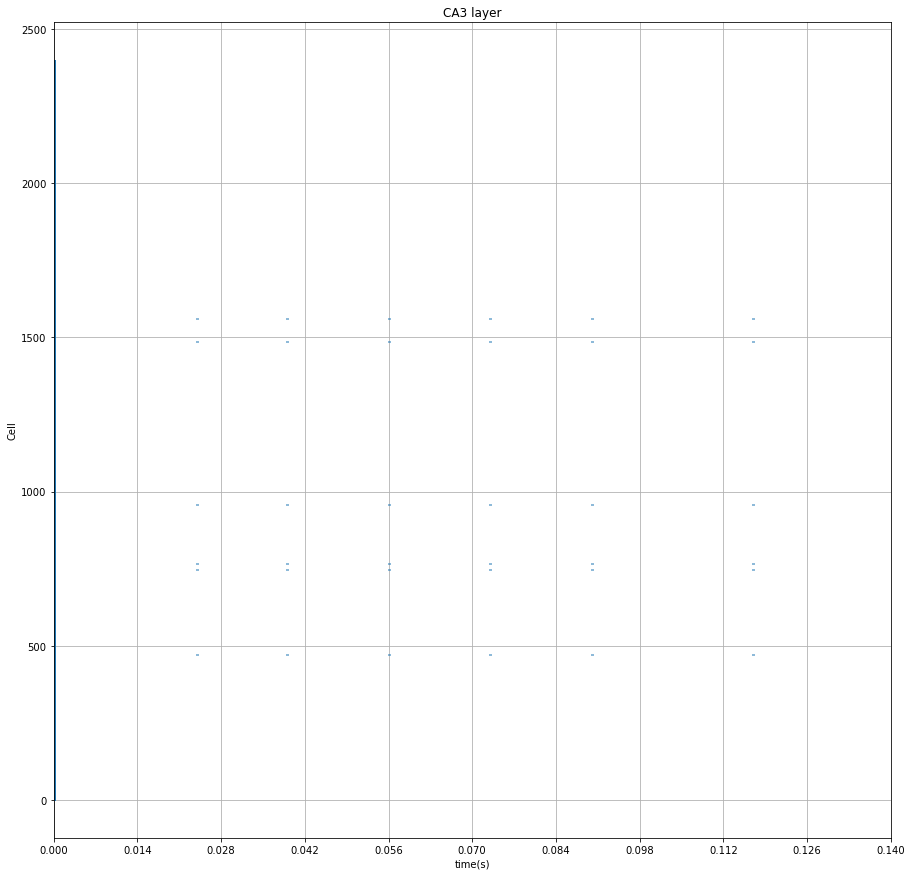

0 :  [0, 1561, 959, 1487, 473, 2140, 1767, 748, 767]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


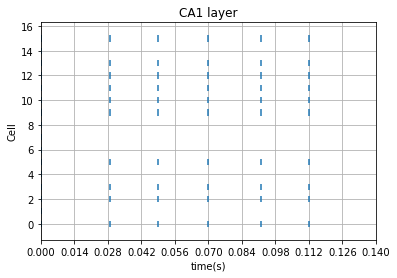

Ret1 :  {0, 1767, 748, 1561, 1487, 767, 473, 2140, 959}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


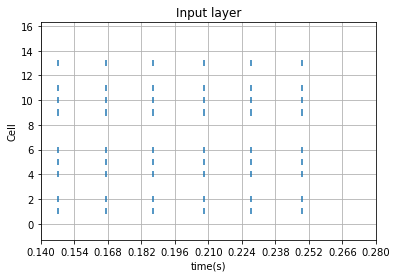

0 :  [ 0  2  3  5  9 10 11 12 13 15]
1 :  [ 1  2  4  5  6  9 10 11 13]


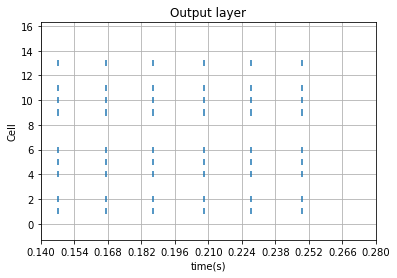

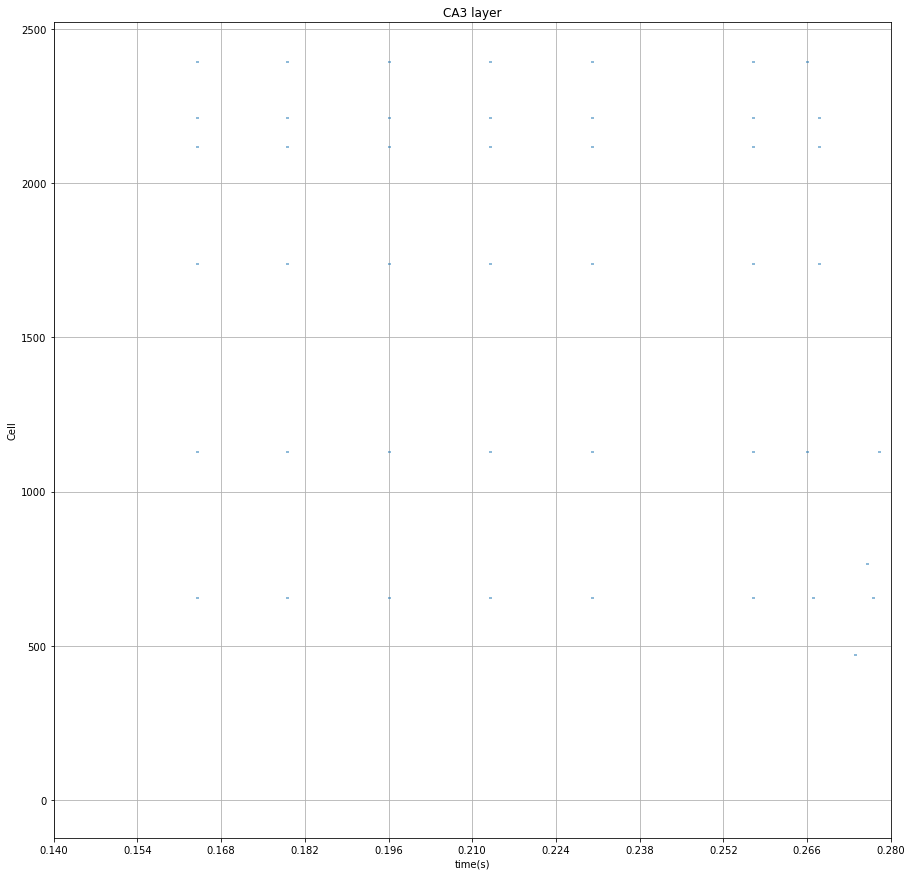

0 :  [0, 1561, 959, 1487, 473, 2140, 1767, 748, 767]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


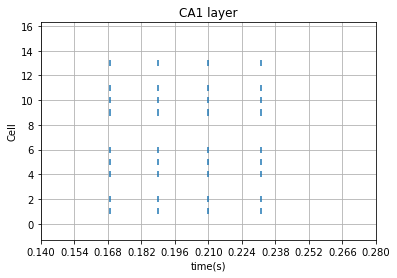

Ret1 :  {2212, 2119, 1130, 2026, 1740, 656, 915, 473, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {473, 2140, 767}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 123 [1663]
0 130 [153]


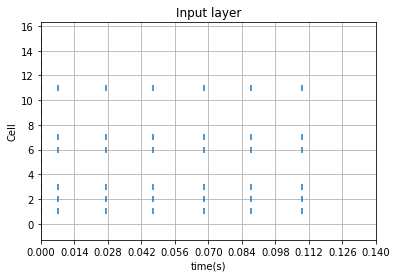

0 :  [ 1  2  3  6  7 11]
1 :  [ 2  3  4  5  7  8 10 11 12 13]


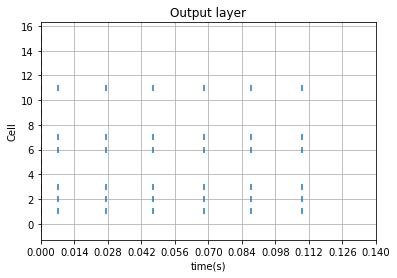

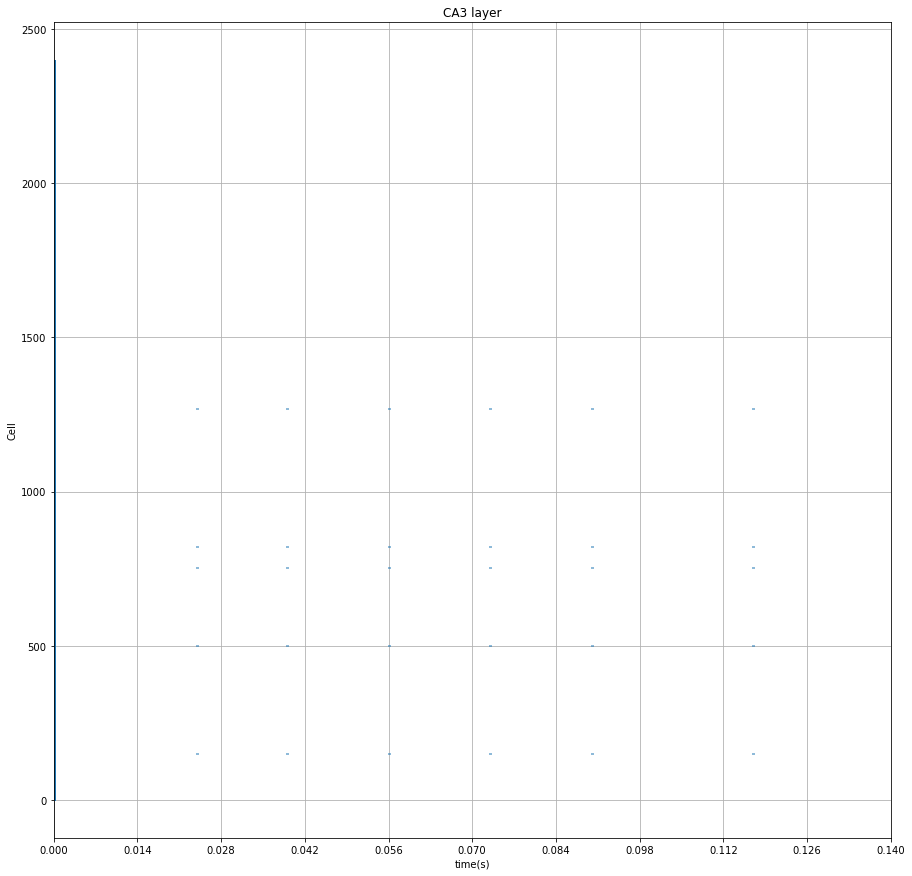

0 :  [822, 1663, 151, 153, 214, 754, 501, 1270, 1271]
1 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


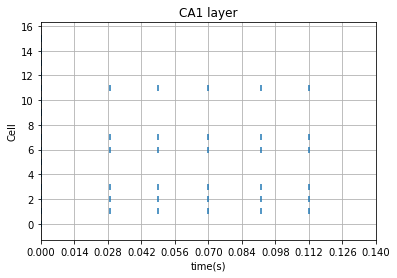

Ret1 :  {754, 501, 214, 151, 822, 153, 1270, 1271, 1663}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 274 [501]


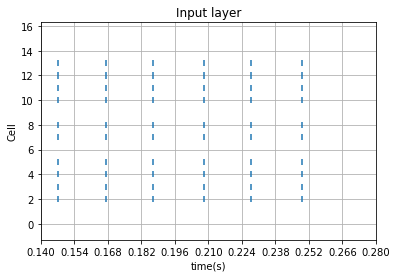

0 :  [ 1  2  3  6  7 11]
1 :  [ 2  3  4  5  7  8 10 11 12 13]


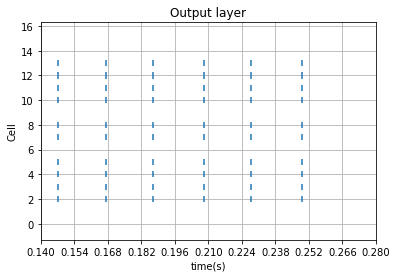

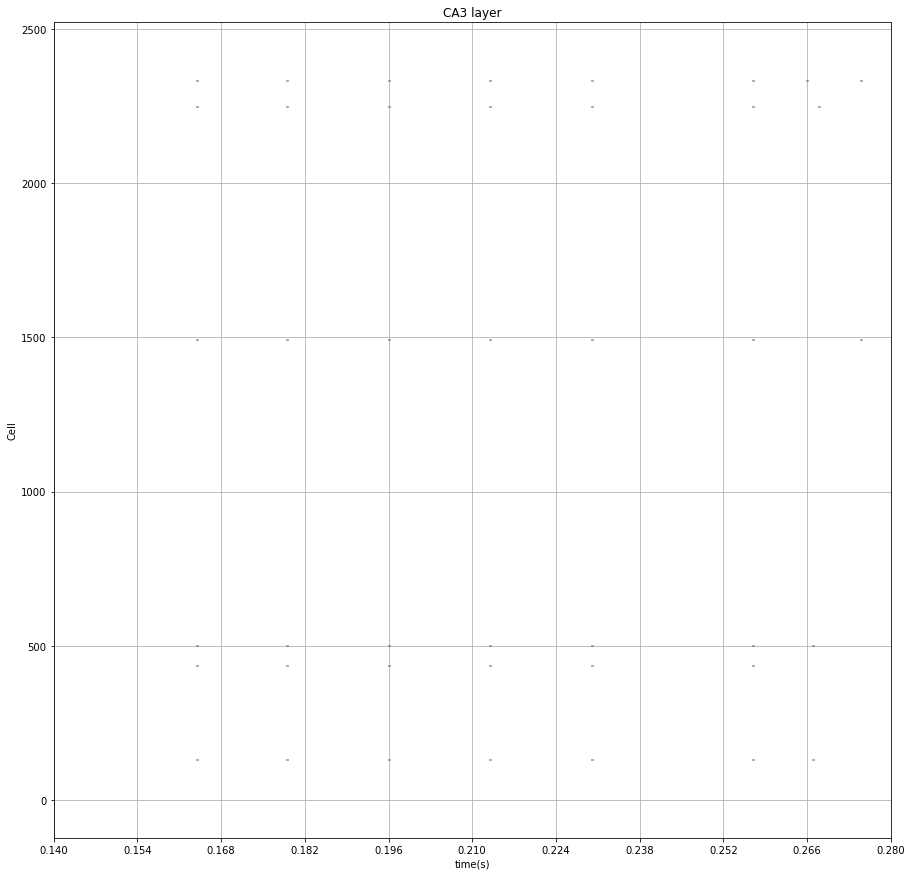

0 :  [822, 1663, 151, 153, 214, 754, 501, 1270, 1271]
1 :  [257, 131, 645, 140, 2332, 436, 571, 827, 2249, 1494, 501]


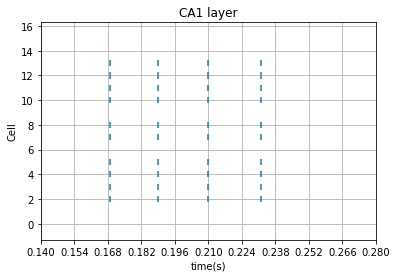

Ret1 :  {257, 827, 131, 645, 2249, 140, 436, 501, 1494, 571, 2332}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {501}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


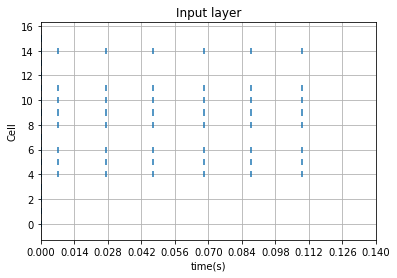

0 :  [ 4  5  6  8  9 10 11 14]
1 :  [ 2  4 10 11 14]


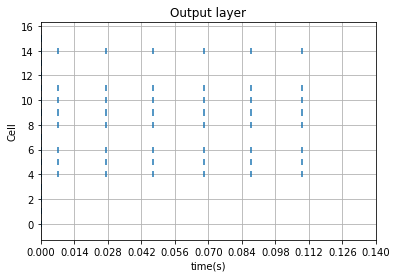

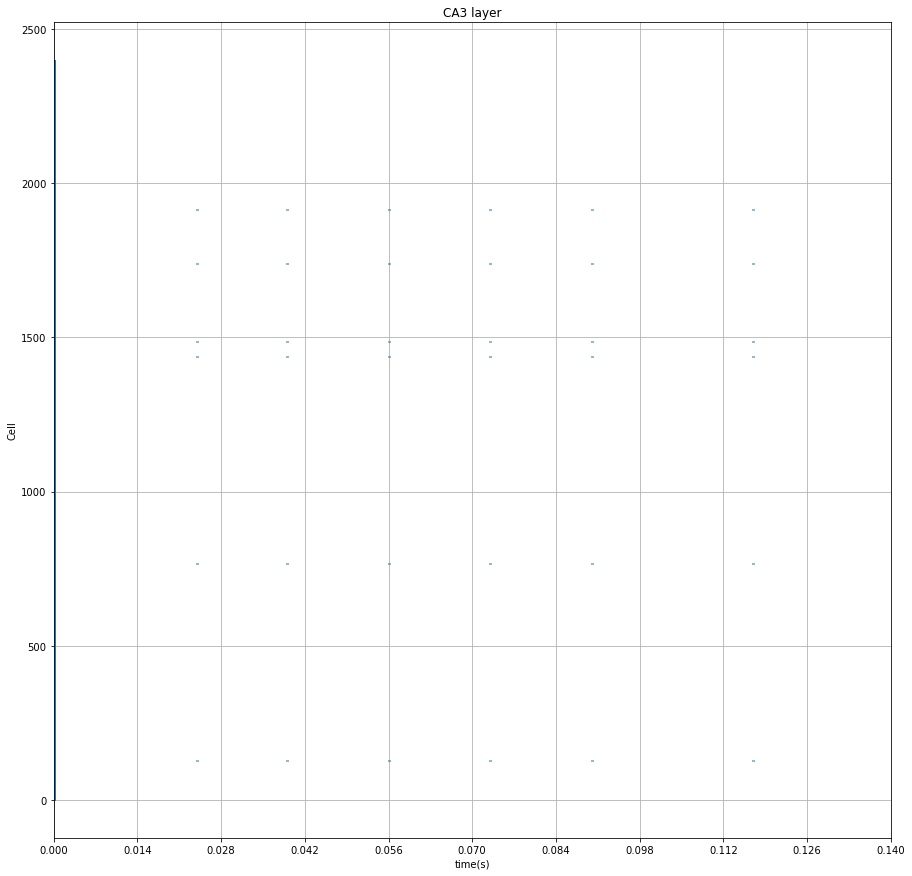

0 :  [128, 1155, 1438, 2363, 1740, 1487, 2140, 1265, 1914, 767]
1 :  [1412, 918, 292, 2221, 2108, 703, 1605, 1740, 1614, 1487, 1130]


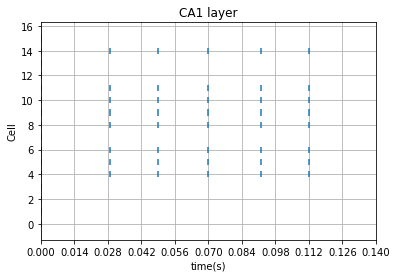

Ret1 :  {128, 1155, 1740, 1487, 1265, 1914, 2363, 2140, 1438, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 272 [2363]


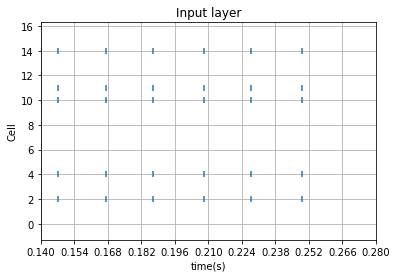

0 :  [ 4  5  6  8  9 10 11 14]
1 :  [ 2  4 10 11 14]


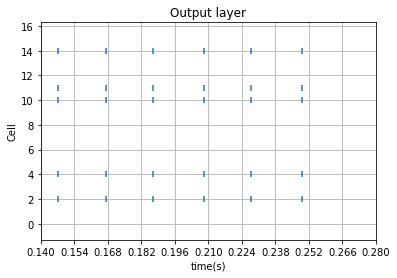

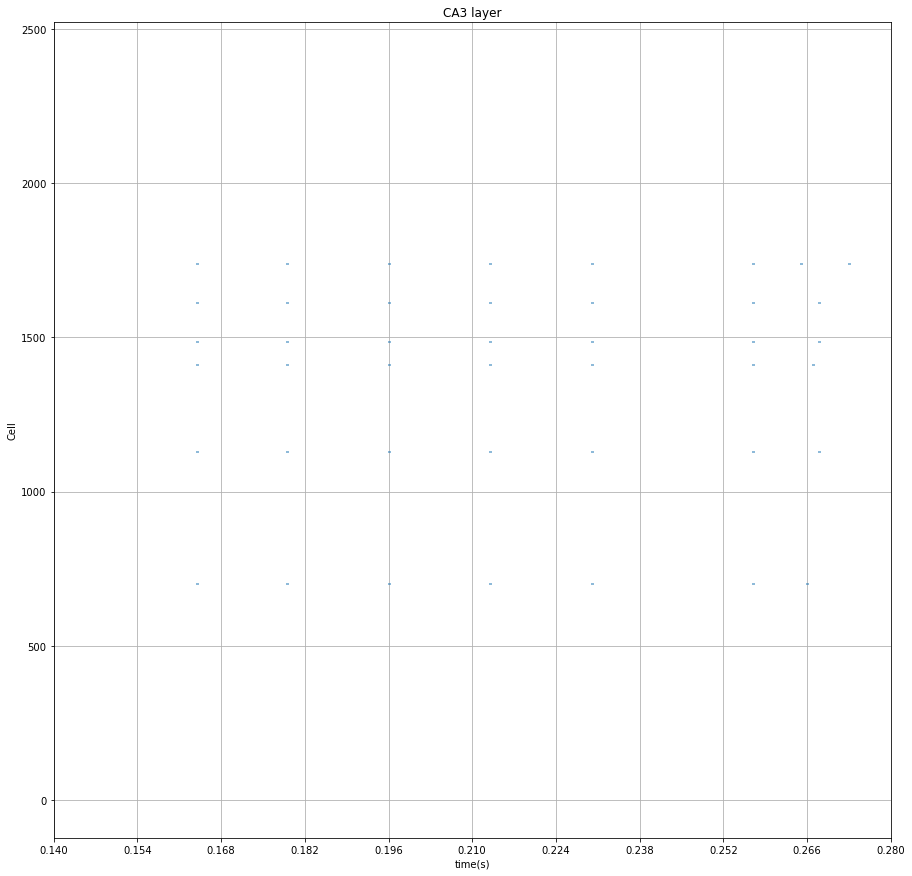

0 :  [128, 1155, 1438, 2363, 1740, 1487, 2140, 1265, 1914, 767]
1 :  [1412, 918, 292, 2221, 2108, 703, 1605, 1740, 1614, 1487, 1130]


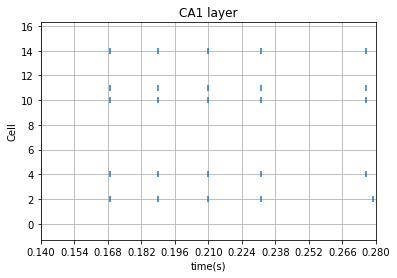

Ret1 :  {1155, 292, 1412, 1605, 1130, 1740, 2221, 1614, 1487, 918, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1155, 1740, 1487}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


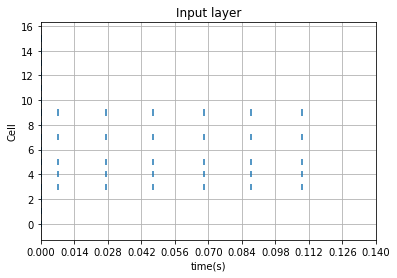

0 :  [3 4 5 7 9]
1 :  [2 3 4 5 6 9]


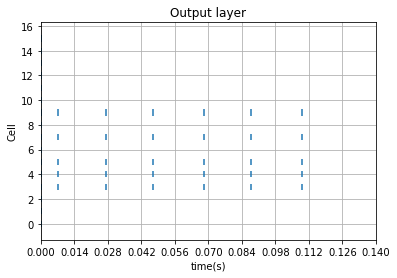

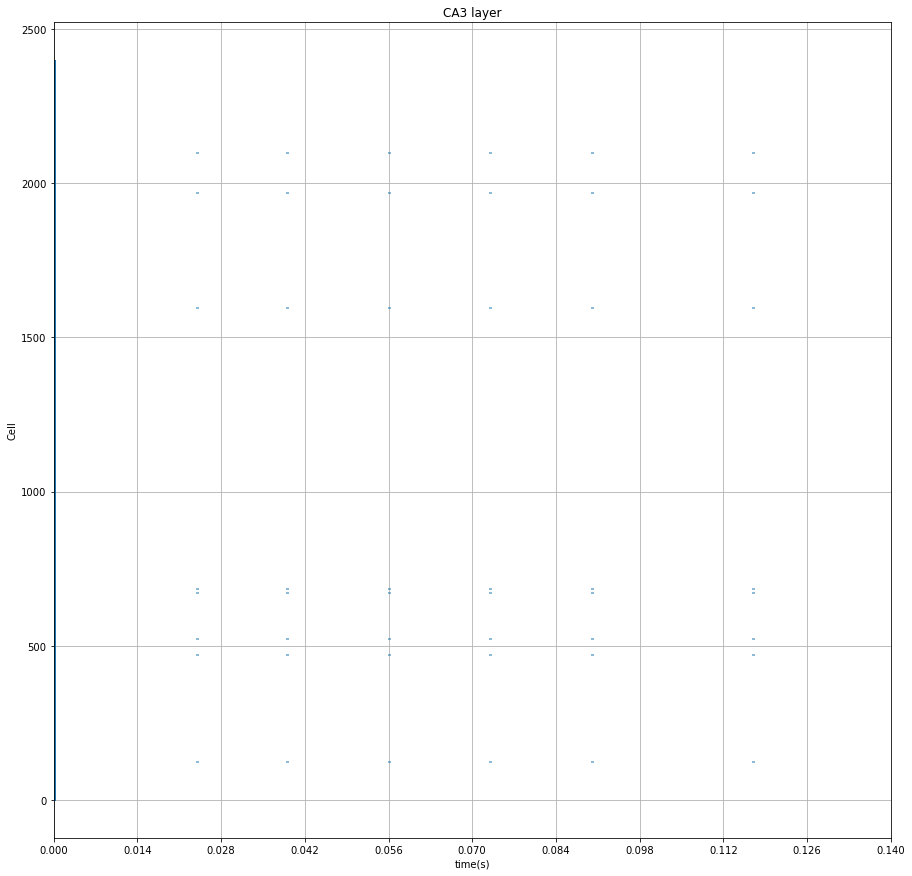

0 :  [2305, 1537, 524, 2099, 1596, 2156, 125, 673, 686, 1970, 473]
1 :  [2313, 1040, 401, 1189, 949, 2099, 962, 2124, 204, 1748, 473, 1771, 378]


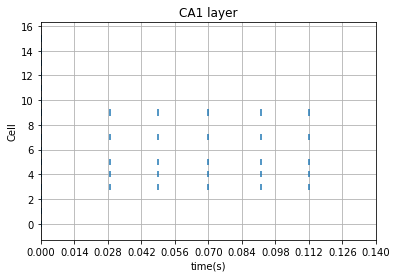

Ret1 :  {673, 1537, 2305, 524, 2156, 686, 1970, 2099, 473, 1596, 125}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 270 [125]


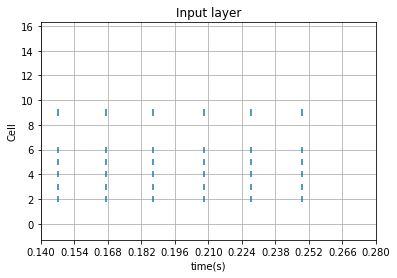

0 :  [3 4 5 7 9]
1 :  [2 3 4 5 6 9]


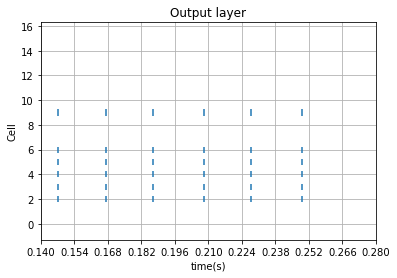

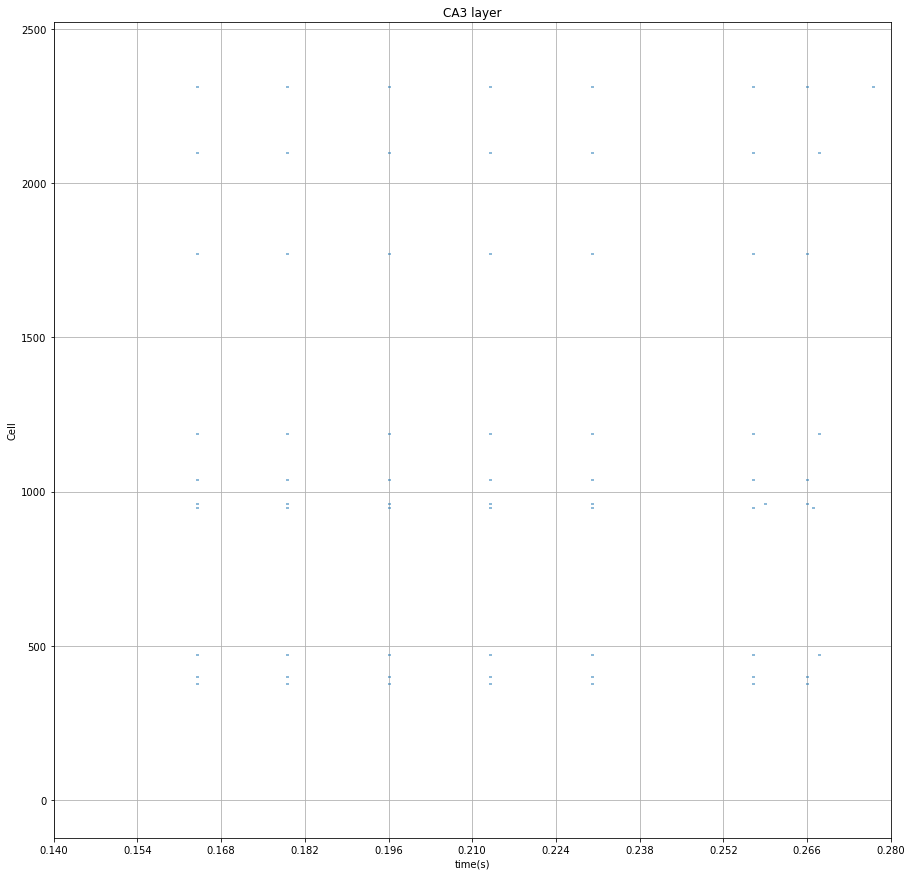

0 :  [2305, 1537, 524, 2099, 1596, 2156, 125, 673, 686, 1970, 473]
1 :  [2313, 1040, 401, 1189, 949, 2099, 962, 2124, 204, 1748, 473, 1771, 378]


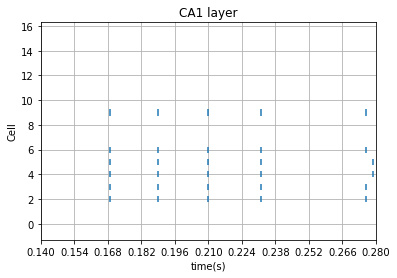

Ret1 :  {1537, 962, 1189, 2313, 1771, 204, 2124, 1040, 401, 2099, 1748, 949, 473, 378}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1537, 2099, 473}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


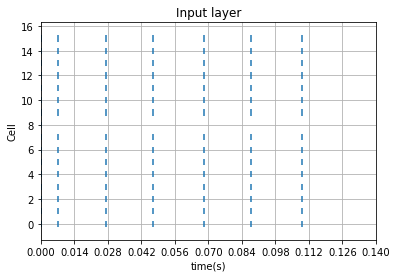

0 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


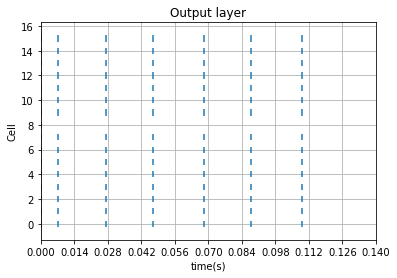

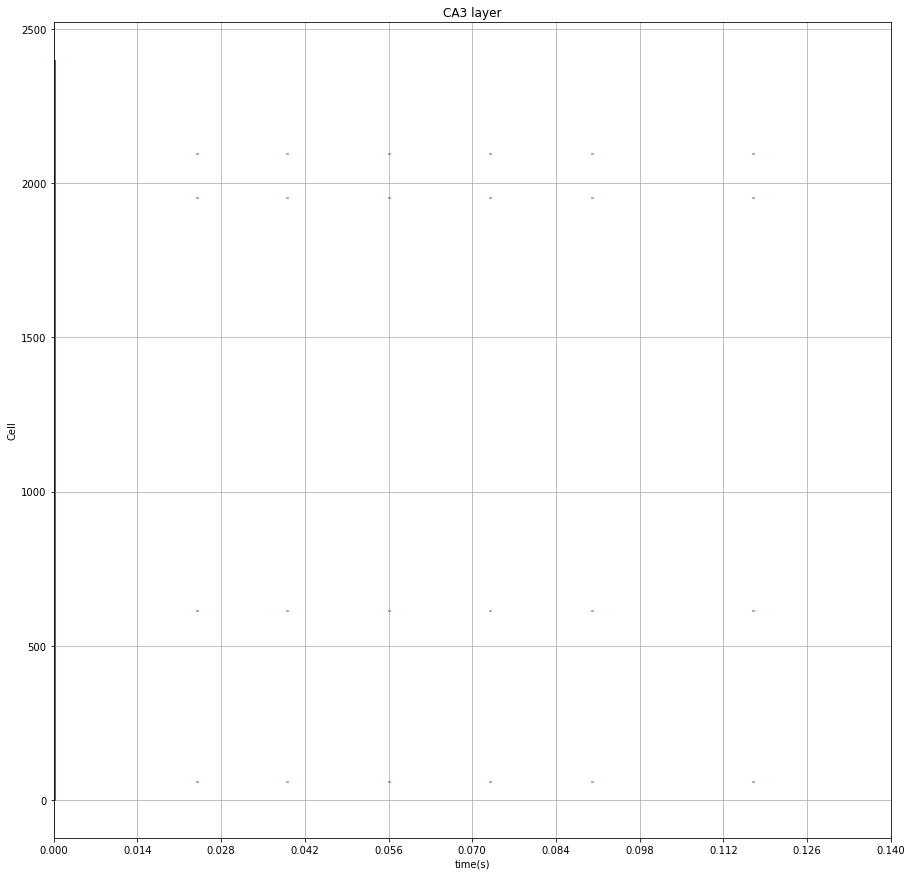

0 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
1 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


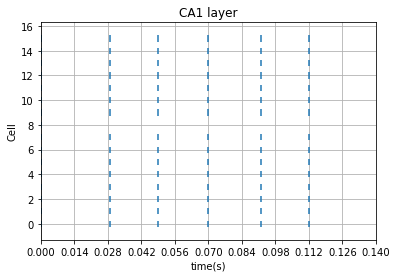

Ret1 :  {1634, 1954, 2114, 614, 876, 2253, 1038, 1391, 2096, 532, 61}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 276 [614]


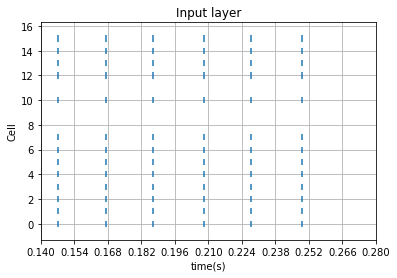

0 :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
1 :  [ 0  1  2  3  4  5  6  7 10 12 13 14 15]


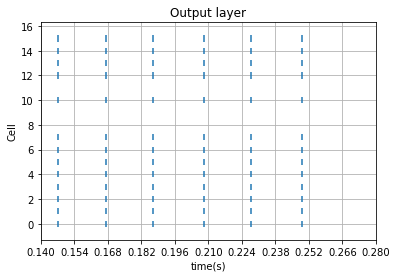

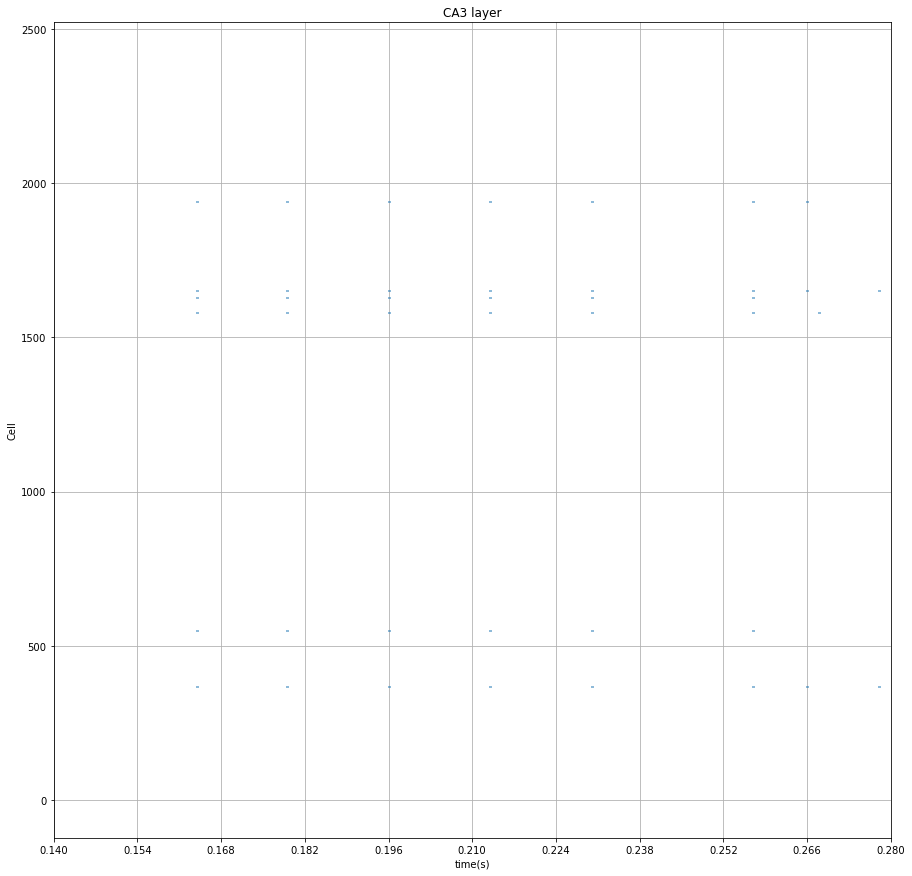

0 :  [1038, 532, 1954, 2096, 61, 2114, 1634, 614, 876, 1391]
1 :  [833, 2114, 1103, 532, 1941, 1757, 798, 1630, 549, 1580, 369, 1653]


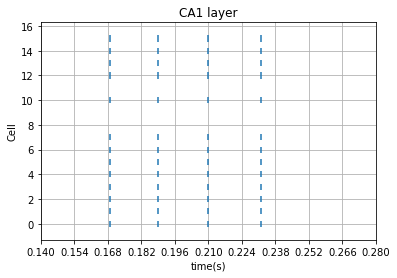

Ret1 :  {833, 2114, 549, 1630, 876, 1580, 1103, 369, 532, 1653, 1941, 1757, 798}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {2114, 876}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


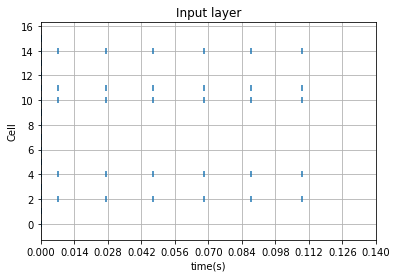

0 :  [ 2  4 10 11 14]
1 :  [ 1  2  4  5  6  9 10 11 13]


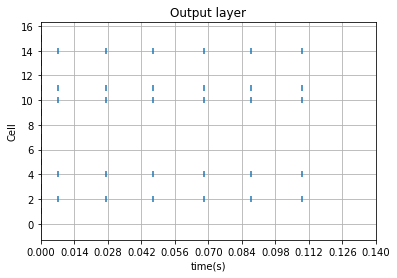

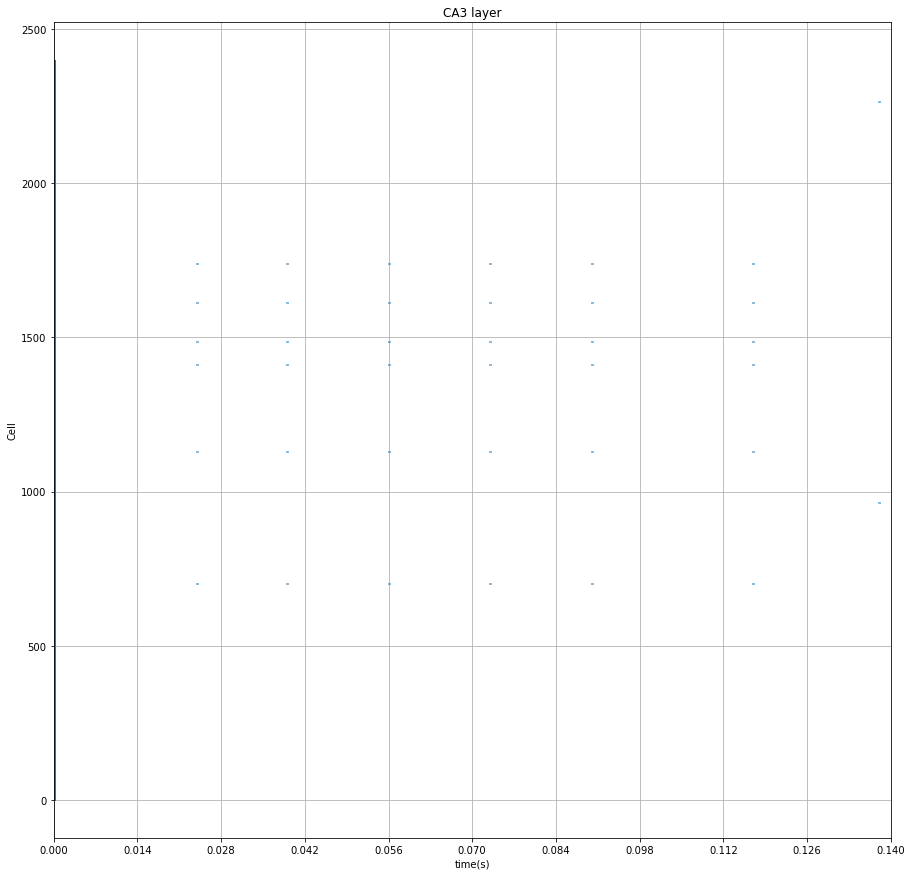

0 :  [1412, 918, 292, 2221, 2108, 703, 1605, 1740, 1614, 1487, 1130]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


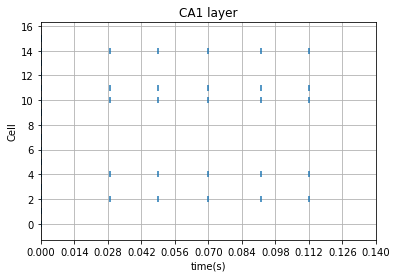

Ret1 :  {292, 965, 1412, 1605, 2265, 1130, 1740, 2221, 1614, 1487, 918, 1881, 2108, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 260 [2108]
0 269 [1740]
0 276 [1740, 1614]


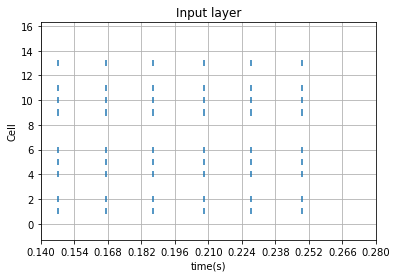

0 :  [ 2  4 10 11 14]
1 :  [ 1  2  4  5  6  9 10 11 13]


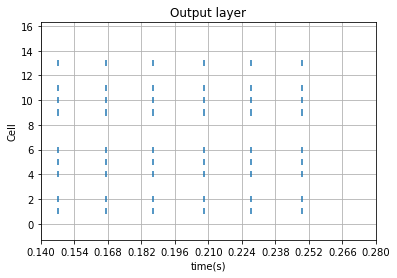

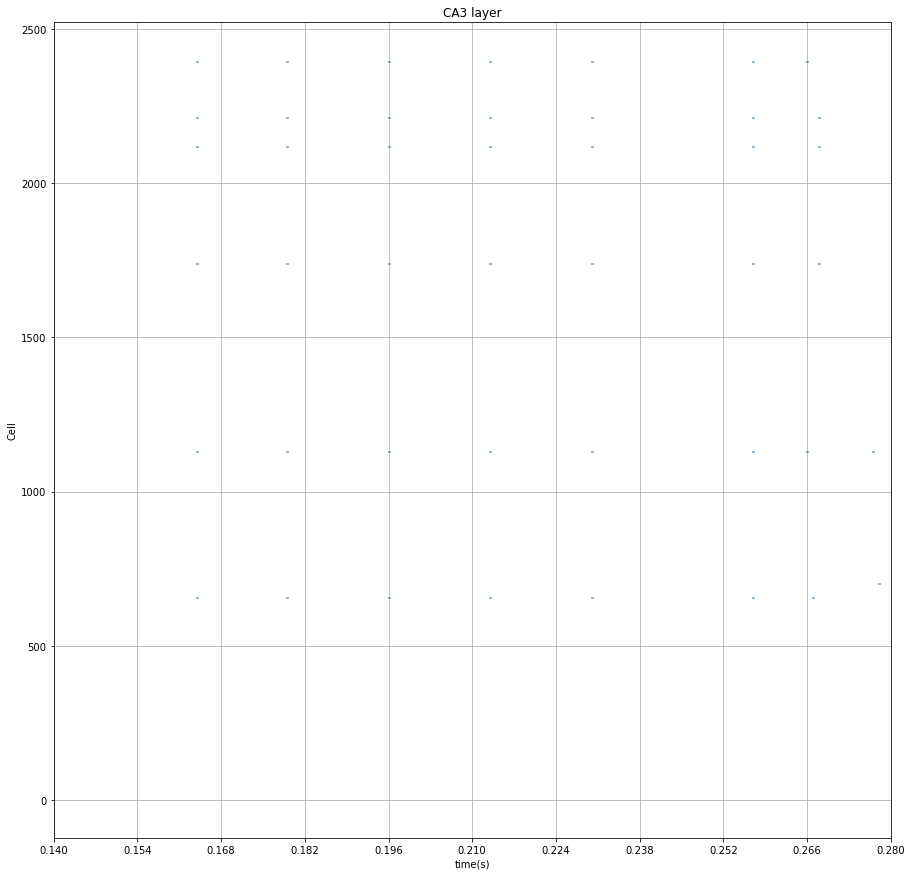

0 :  [1412, 918, 292, 2221, 2108, 703, 1605, 1740, 1614, 1487, 1130]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


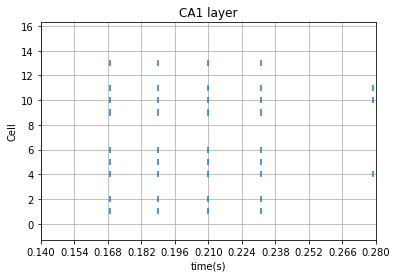

Ret1 :  {2212, 1605, 2119, 1130, 2026, 1740, 656, 915, 2395, 2140, 1598, 703}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1130, 1740, 1605, 703}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


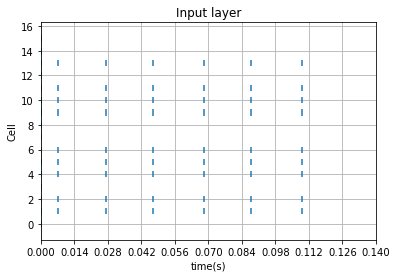

0 :  [ 1  2  4  5  6  9 10 11 13]
1 :  [ 0  3  5  9 10 12 13]


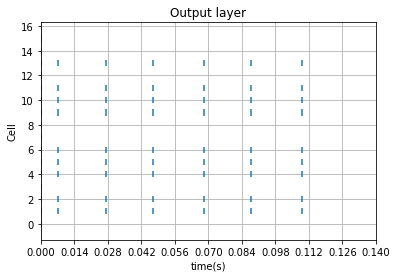

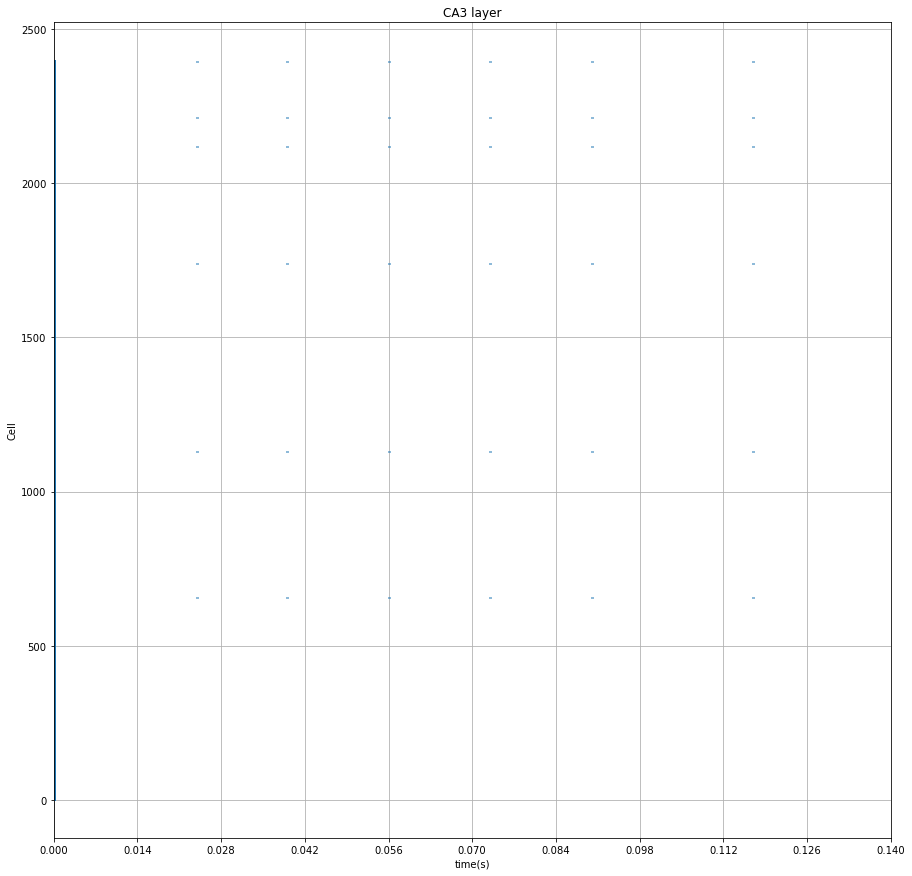

0 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]
1 :  [1412, 1673, 915, 2071, 416, 1212, 1218, 1737, 1995, 1869, 1487, 2140]


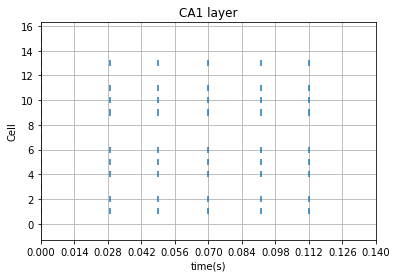

Ret1 :  {2212, 2119, 1130, 2026, 1740, 656, 915, 2395, 2140, 1598}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 269 [1740]


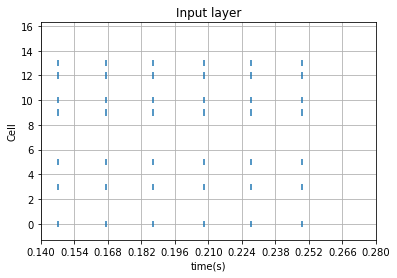

0 :  [ 1  2  4  5  6  9 10 11 13]
1 :  [ 0  3  5  9 10 12 13]


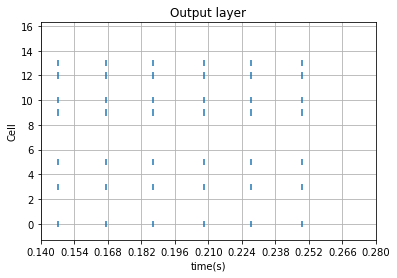

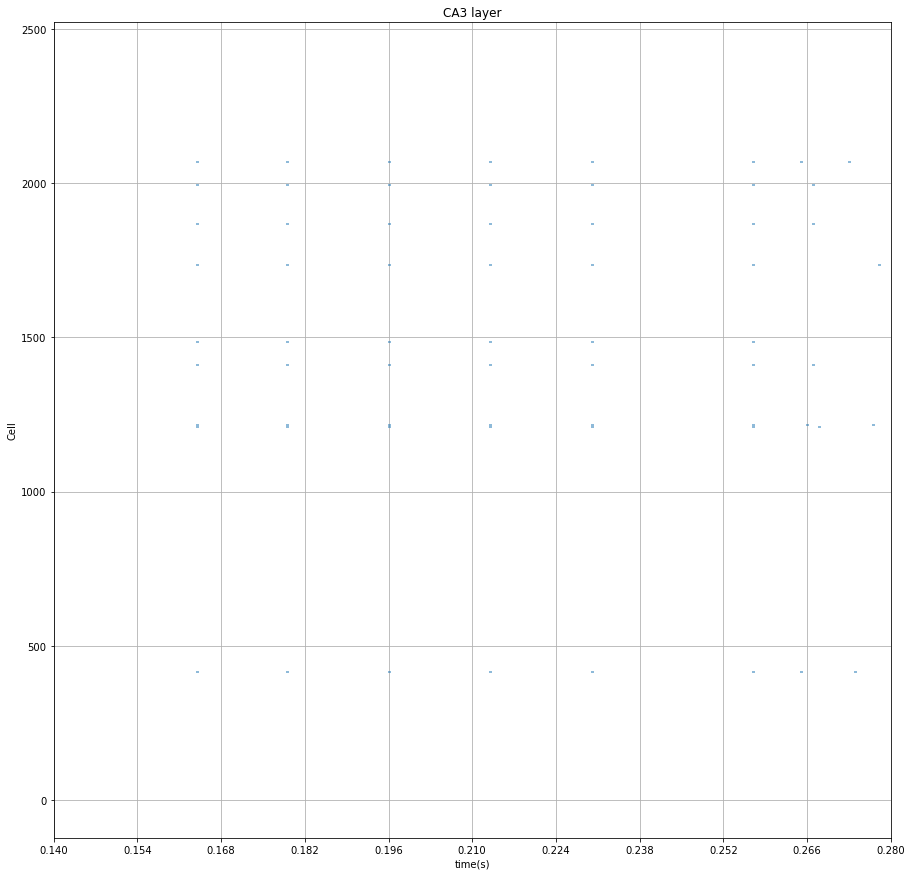

0 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]
1 :  [1412, 1673, 915, 2071, 416, 1212, 1218, 1737, 1995, 1869, 1487, 2140]


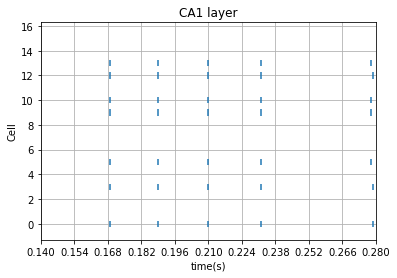

Ret1 :  {416, 1218, 1412, 1673, 1737, 1995, 1869, 1487, 2140, 915, 2071, 1212, 1598}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {915, 2140, 1598}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 121 [1251]
0 129 [2071]


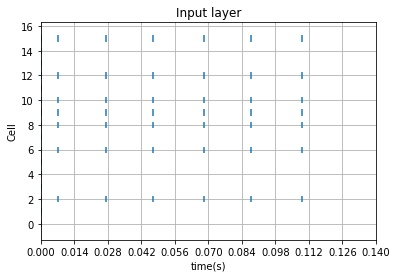

0 :  [ 2  6  8  9 10 12 15]
1 :  [ 4  5  6  8  9 10 11 14]


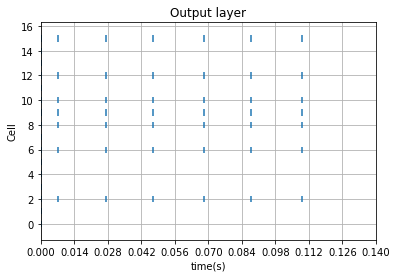

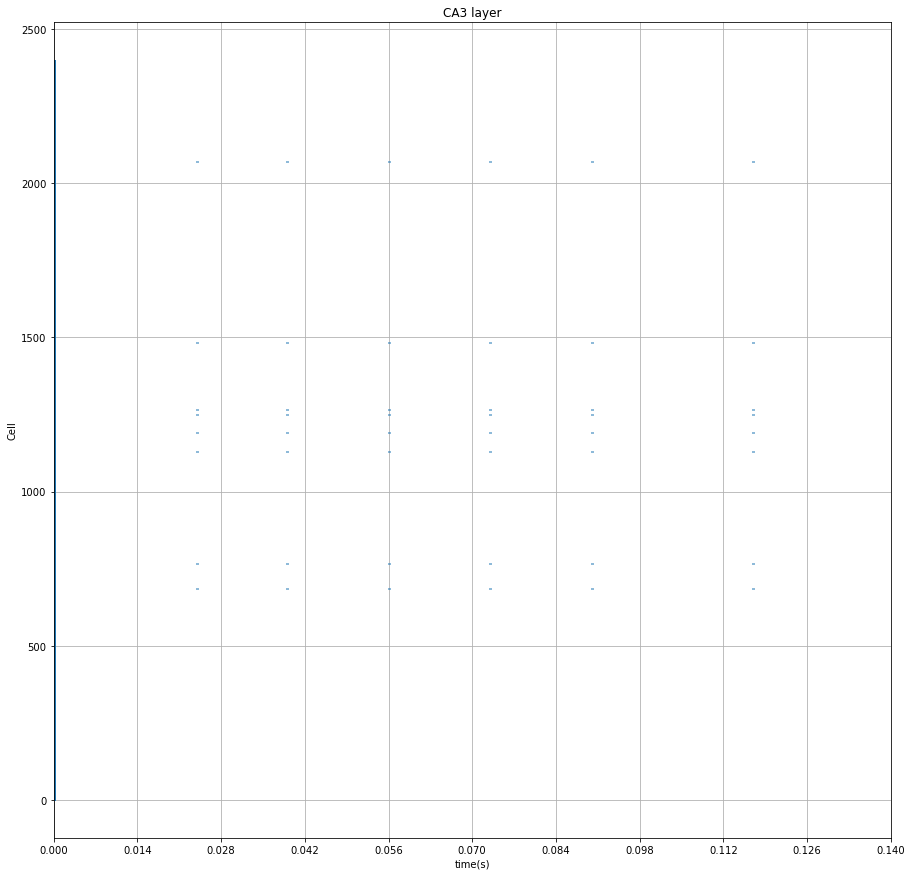

0 :  [2071, 1192, 686, 1991, 1484, 2140, 1251, 1130, 1266, 767]
1 :  [128, 1155, 1438, 2363, 1740, 1487, 2140, 1265, 1914, 767]


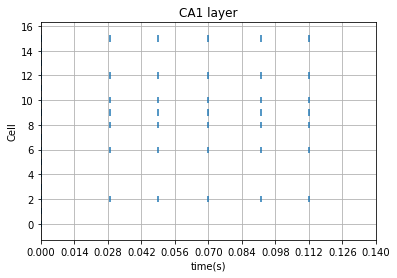

Ret1 :  {1251, 1991, 1192, 1130, 1484, 686, 1266, 2071, 2140, 477, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


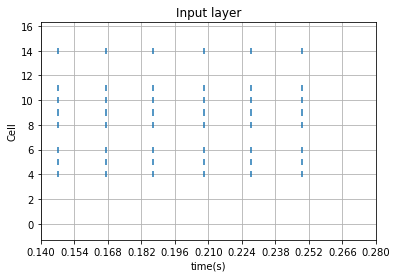

0 :  [ 2  6  8  9 10 12 15]
1 :  [ 4  5  6  8  9 10 11 14]


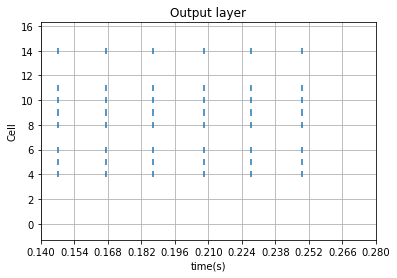

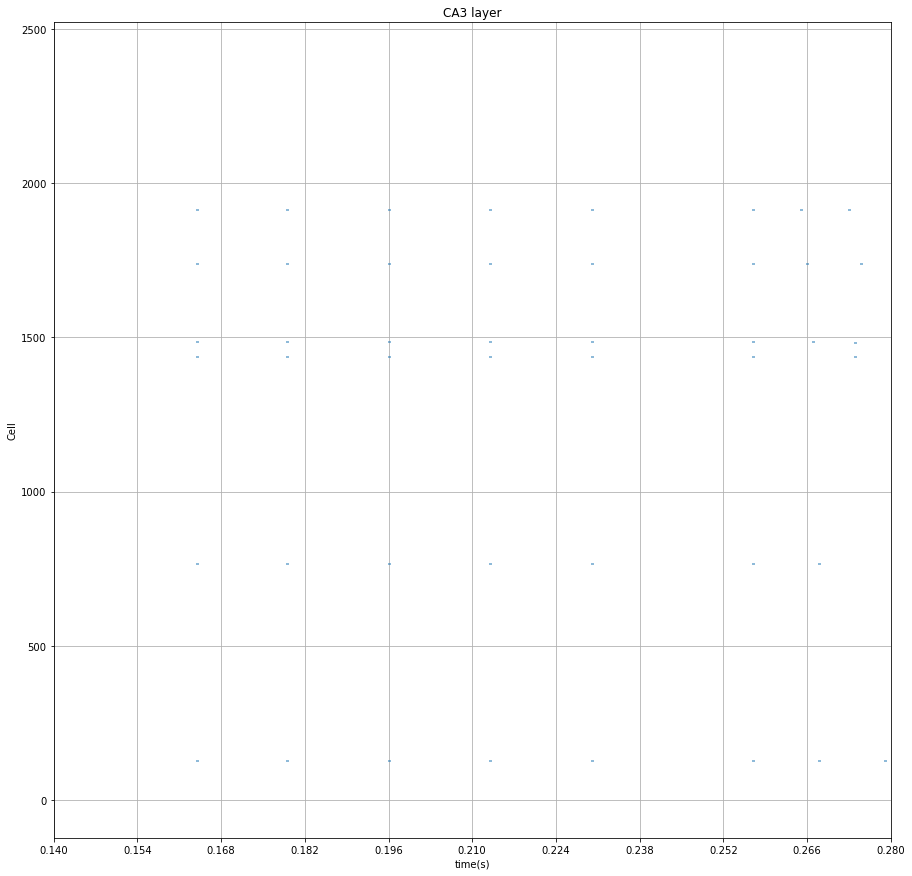

0 :  [2071, 1192, 686, 1991, 1484, 2140, 1251, 1130, 1266, 767]
1 :  [128, 1155, 1438, 2363, 1740, 1487, 2140, 1265, 1914, 767]


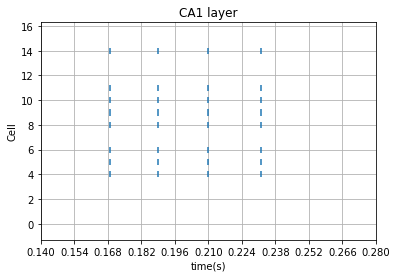

Ret1 :  {128, 1155, 1484, 1740, 1487, 1265, 1914, 2363, 2140, 1438, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {767, 1484, 2140}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


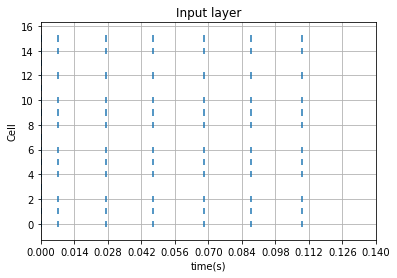

0 :  [ 0  1  2  4  5  6  8  9 10 12 14 15]
1 :  [ 1  2  9 10 12 14]


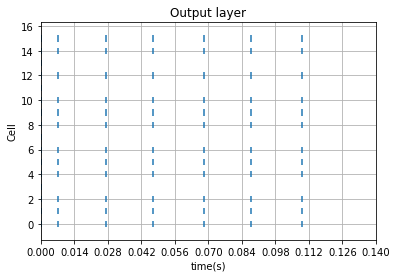

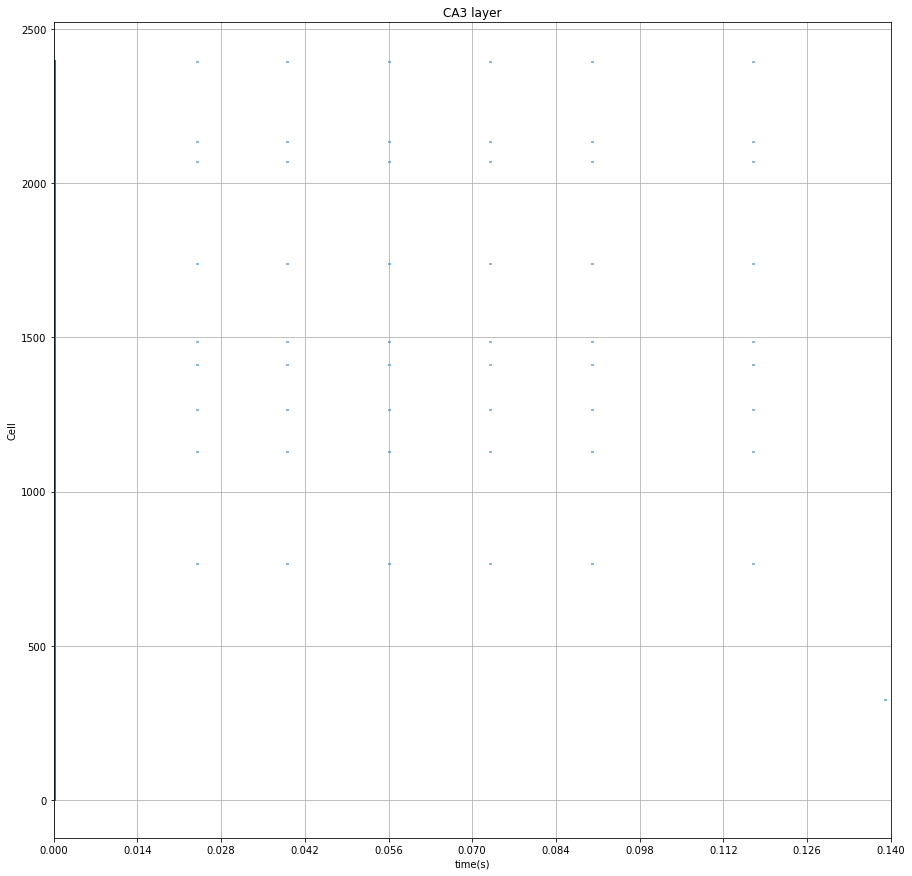

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [2071, 1534, 1598, 575, 75, 137, 666, 187, 978, 2262, 730, 1266]


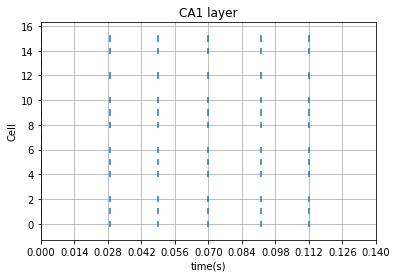

Ret1 :  {1412, 326, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 260 [2136]
0 267 [2071]


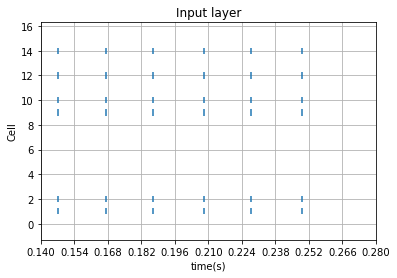

0 :  [ 0  1  2  4  5  6  8  9 10 12 14 15]
1 :  [ 1  2  9 10 12 14]


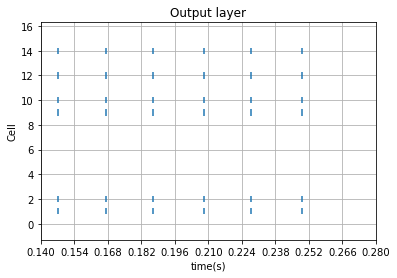

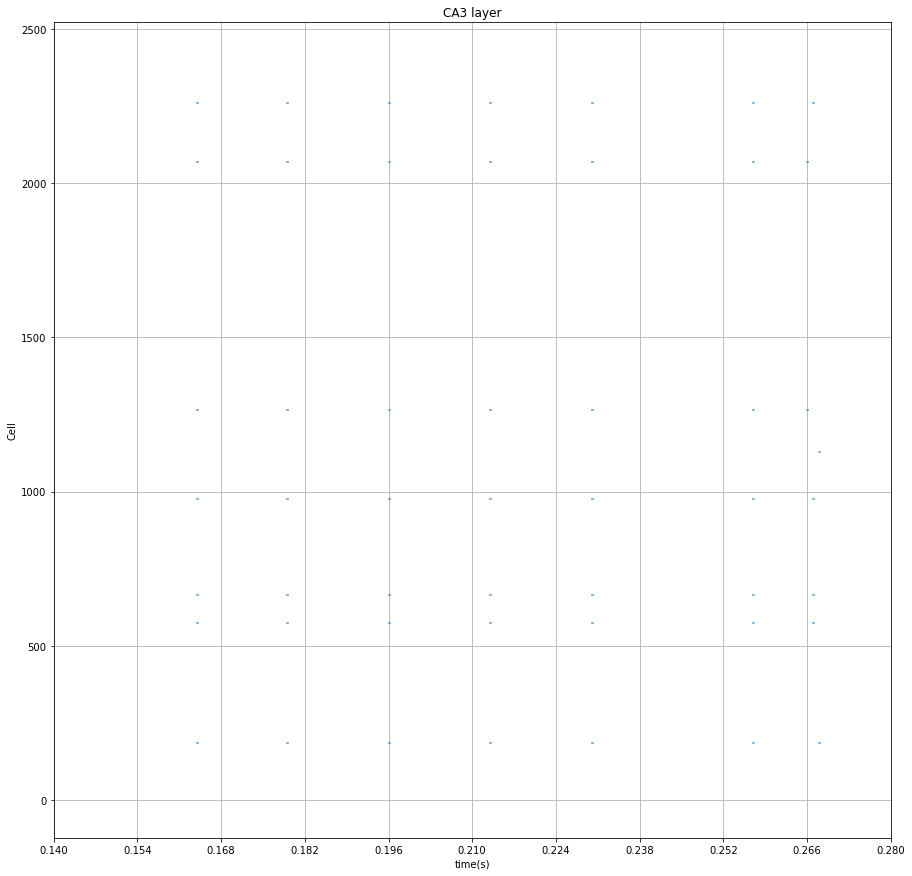

0 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]
1 :  [2071, 1534, 1598, 575, 75, 137, 666, 187, 978, 2262, 730, 1266]


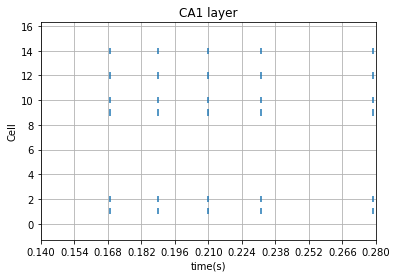

Ret1 :  {1598, 137, 1130, 75, 978, 1266, 2262, 2071, 730, 666, 187, 1534, 575}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1130, 1266, 1598, 2071}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 124 [1991]


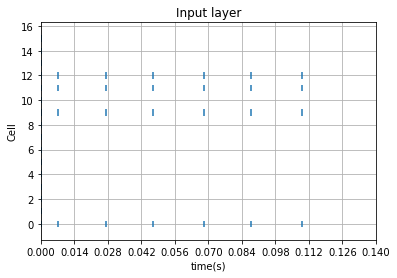

0 :  [ 0  9 11 12]
1 :  [ 0  1  2  3  6  7  8  9 11 12 13 15]


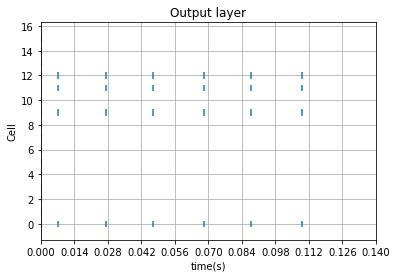

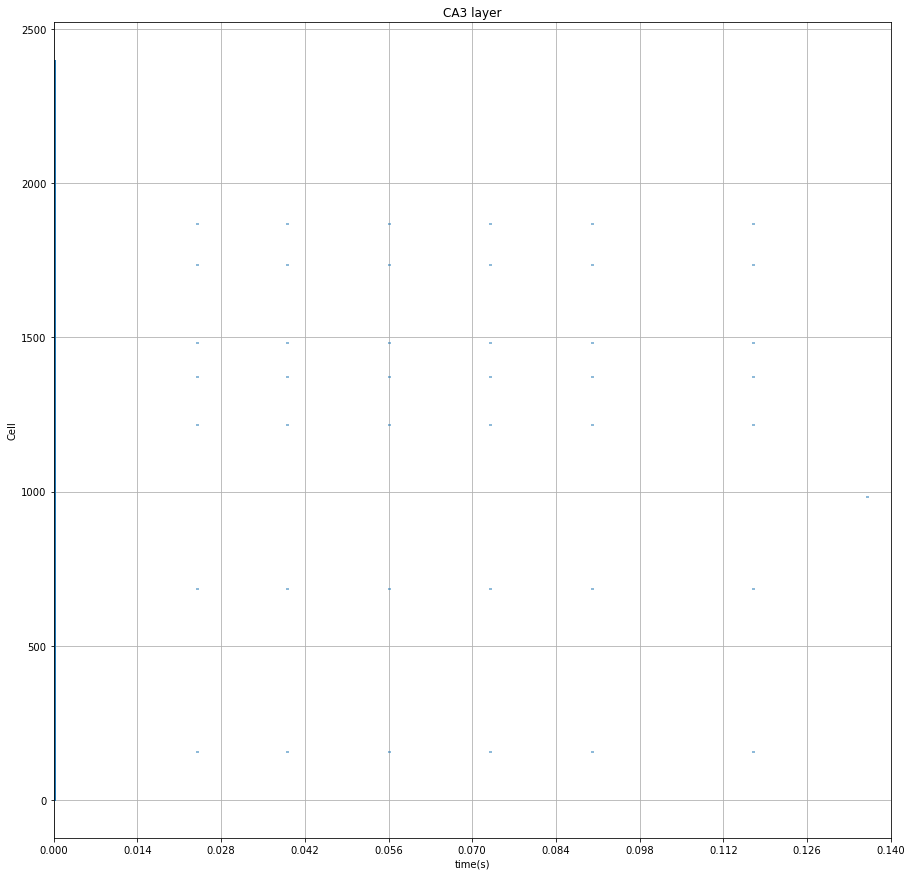

0 :  [1673, 158, 686, 49, 1218, 1864, 1737, 1991, 1869, 2376, 1484, 2380, 1374, 357]
1 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]


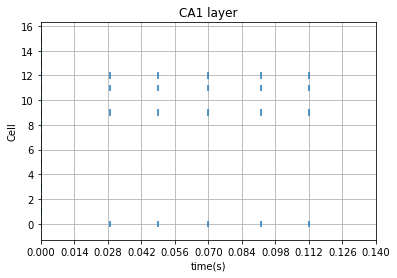

Ret1 :  {1374, 1218, 357, 1991, 1864, 1673, 1737, 2376, 1484, 1869, 686, 2380, 49, 985, 158}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 265 [1374]


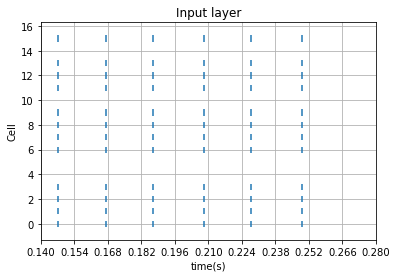

0 :  [ 0  9 11 12]
1 :  [ 0  1  2  3  6  7  8  9 11 12 13 15]


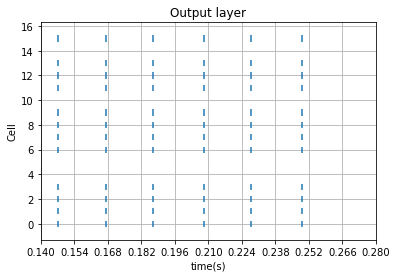

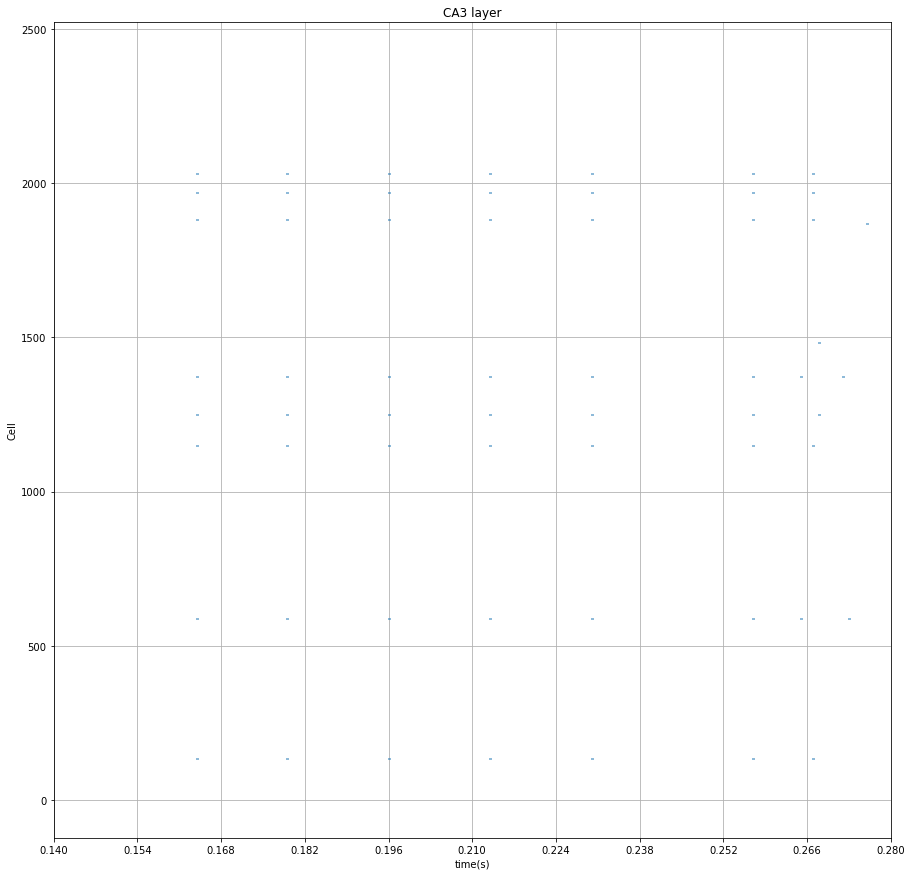

0 :  [1673, 158, 686, 49, 1218, 1864, 1737, 1991, 1869, 2376, 1484, 2380, 1374, 357]
1 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]


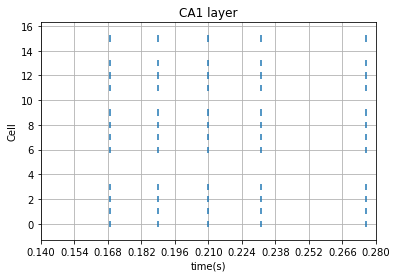

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 1484, 1869, 2031, 2380, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1991, 2380, 1484, 1869, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 124 [1251]


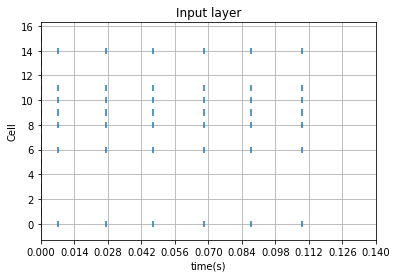

0 :  [ 0  6  8  9 10 11 14]
1 :  [ 1  2  4  5  6  9 10 11 13]


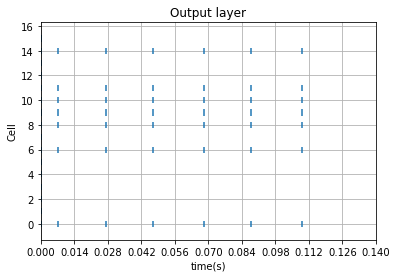

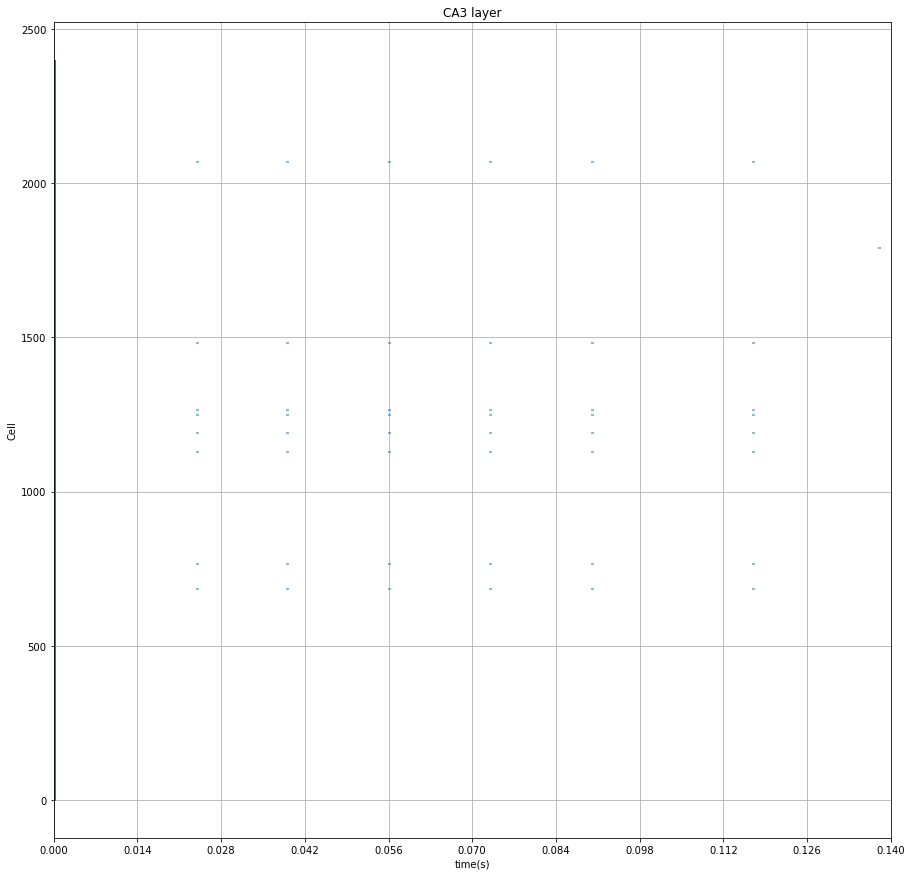

0 :  [2071, 1192, 686, 1991, 1484, 2140, 1251, 1130, 1266, 767]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


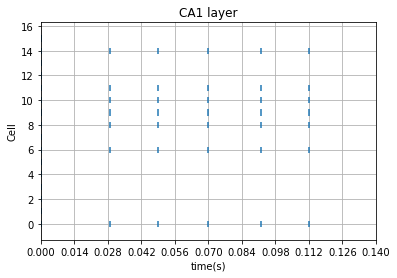

Ret1 :  {1251, 1926, 1991, 1192, 1130, 1484, 686, 1266, 1791, 2071, 2140, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 260 [1192]


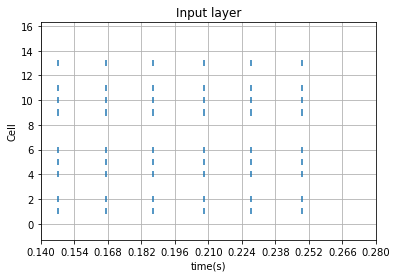

0 :  [ 0  6  8  9 10 11 14]
1 :  [ 1  2  4  5  6  9 10 11 13]


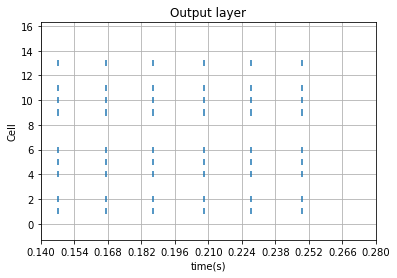

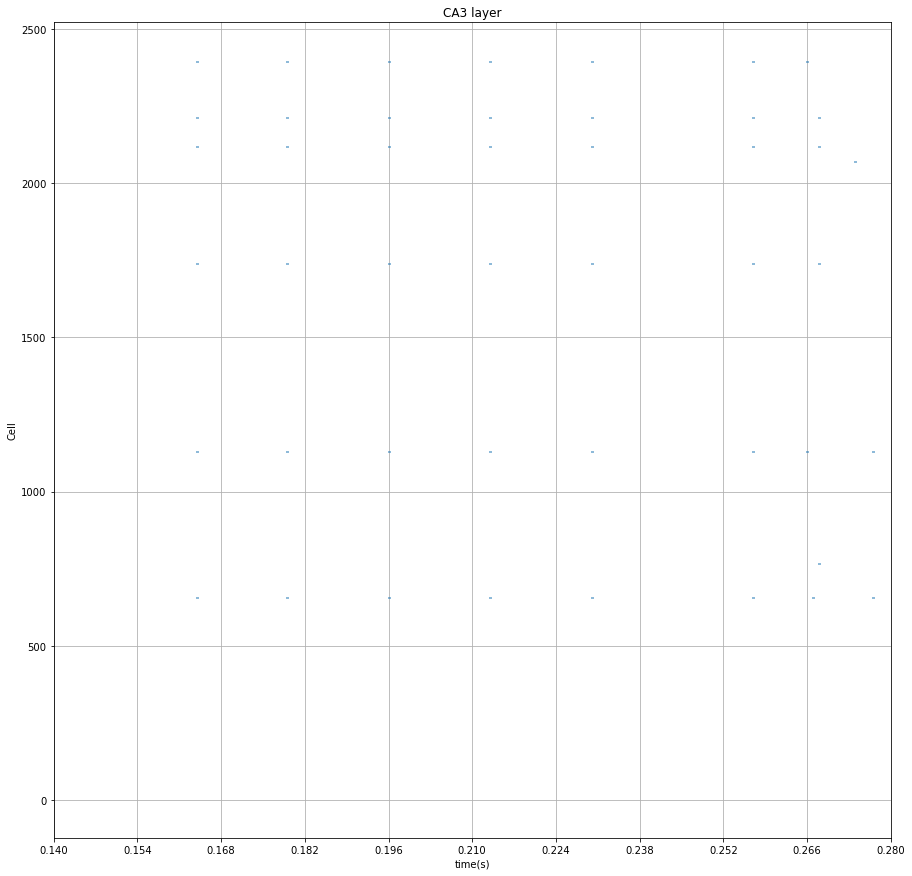

0 :  [2071, 1192, 686, 1991, 1484, 2140, 1251, 1130, 1266, 767]
1 :  [656, 915, 2212, 1598, 2119, 1740, 2395, 2140, 1130, 2026]


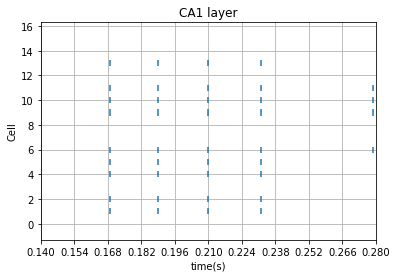

Ret1 :  {2212, 1991, 2119, 1130, 2026, 1740, 656, 915, 2071, 88, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1991, 1130, 2071, 2140, 767}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


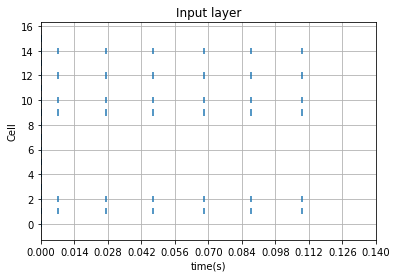

0 :  [ 1  2  9 10 12 14]
1 :  [ 1  2  3  5  6  8  9 10 11 12 14 15]


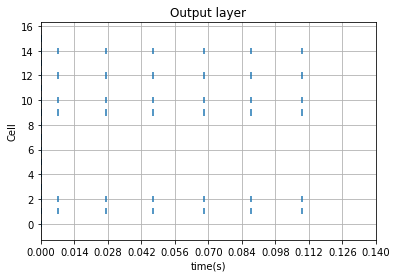

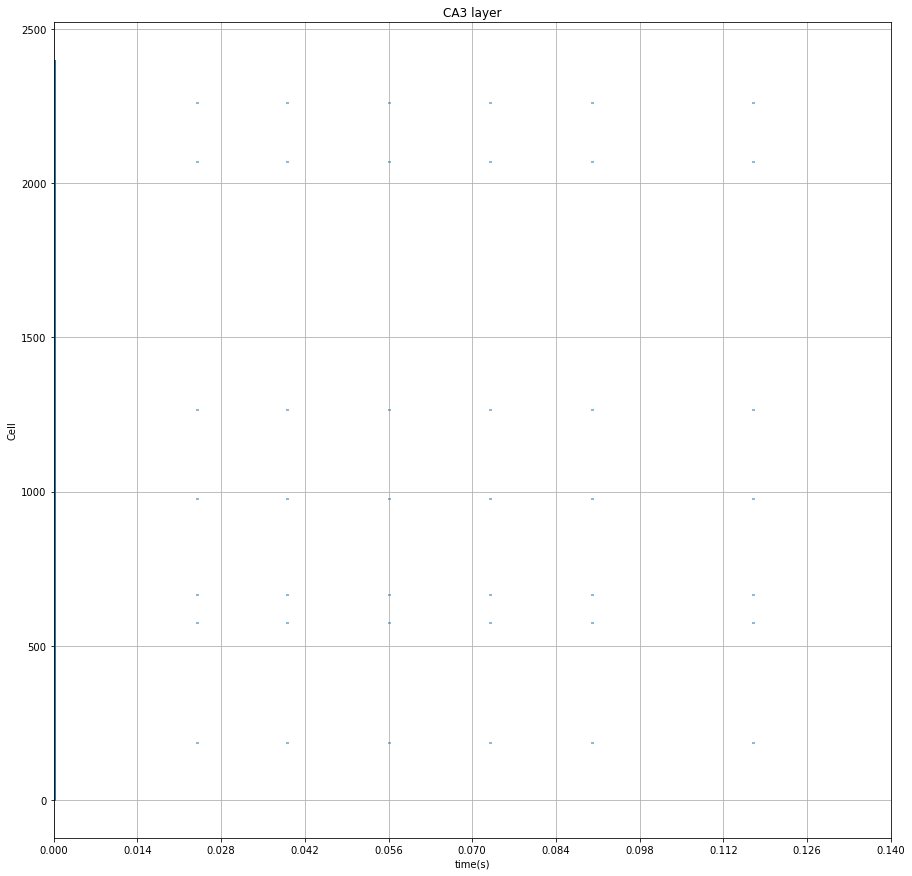

0 :  [2071, 1534, 1598, 575, 75, 137, 666, 187, 978, 2262, 730, 1266]
1 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]


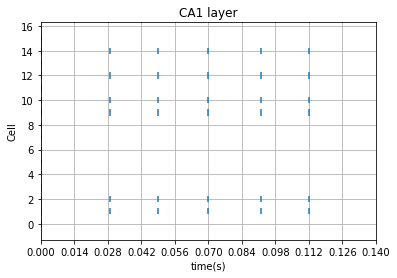

Ret1 :  {1598, 137, 75, 978, 1266, 2262, 2071, 730, 666, 187, 1534, 575}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


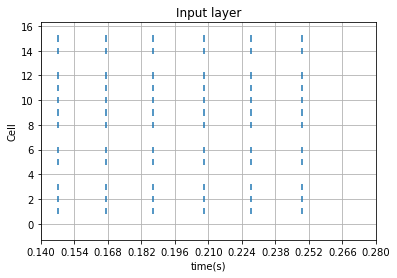

0 :  [ 1  2  9 10 12 14]
1 :  [ 1  2  3  5  6  8  9 10 11 12 14 15]


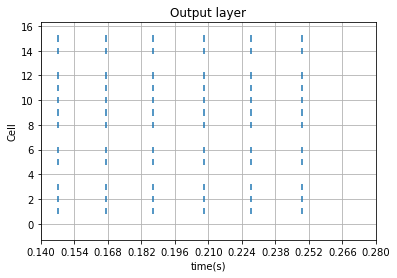

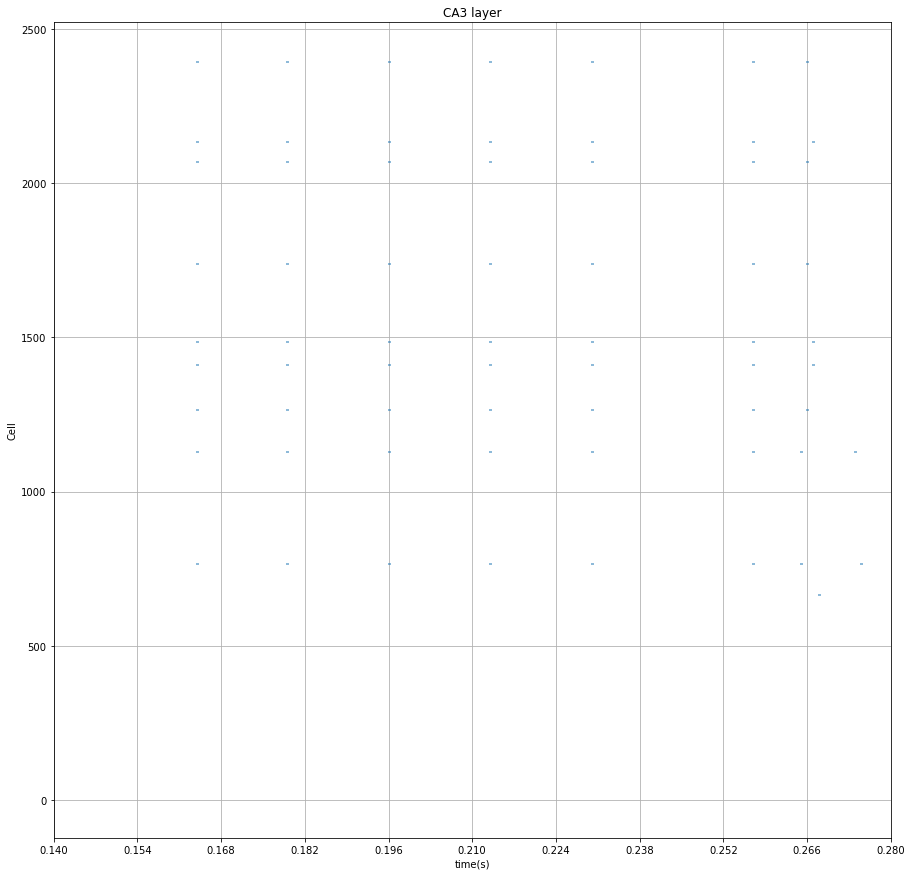

0 :  [2071, 1534, 1598, 575, 75, 137, 666, 187, 978, 2262, 730, 1266]
1 :  [1412, 1740, 1487, 915, 2071, 2136, 2395, 2140, 1130, 2026, 1265, 1266, 1598, 767]


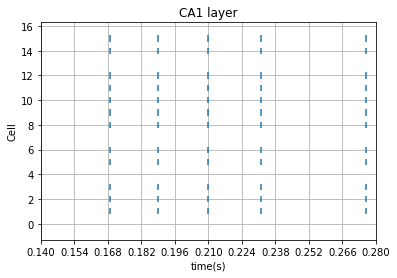

Ret1 :  {1412, 1130, 2026, 1740, 1487, 1265, 1266, 915, 2071, 2136, 666, 2395, 2140, 1598, 767}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1266, 666, 1598, 2071}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0
0 121 [588]
0 124 [1991]
0 126 [134]
0 133 [1251]
0 134 [1281]
0 139 [1969]


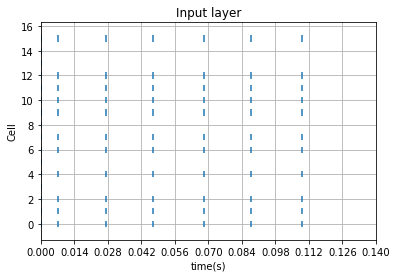

0 :  [ 0  1  2  4  6  7  9 10 11 12 15]
1 :  [ 2  6  9 11 12 13]


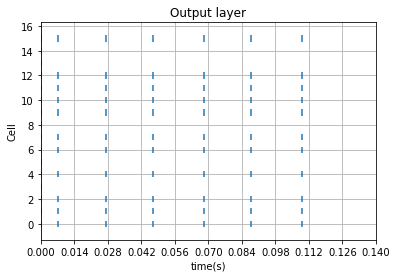

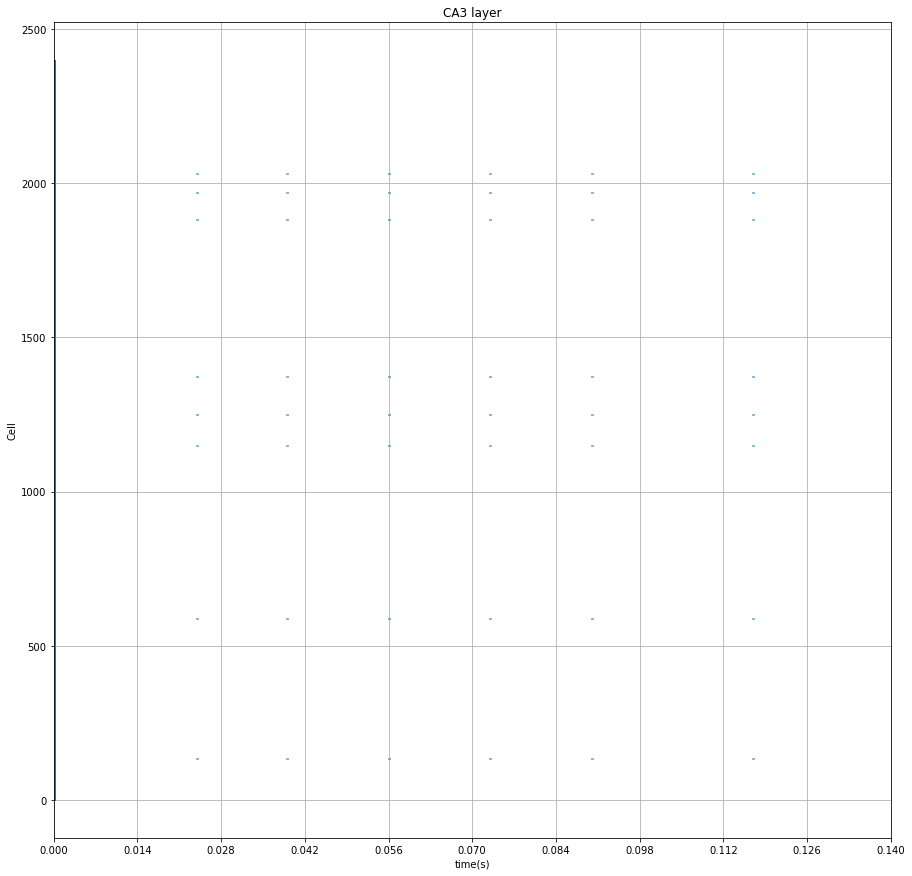

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


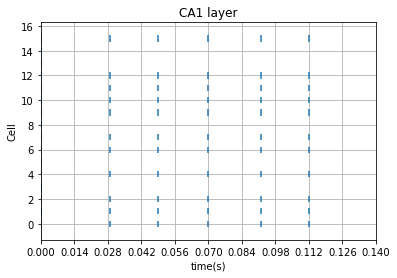

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 265 [658]
0 269 [658]


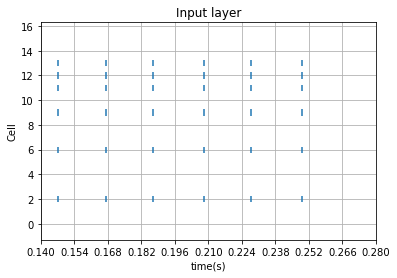

0 :  [ 0  1  2  4  6  7  9 10 11 12 15]
1 :  [ 2  6  9 11 12 13]


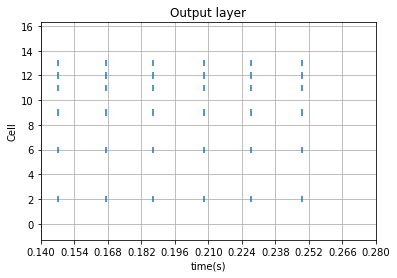

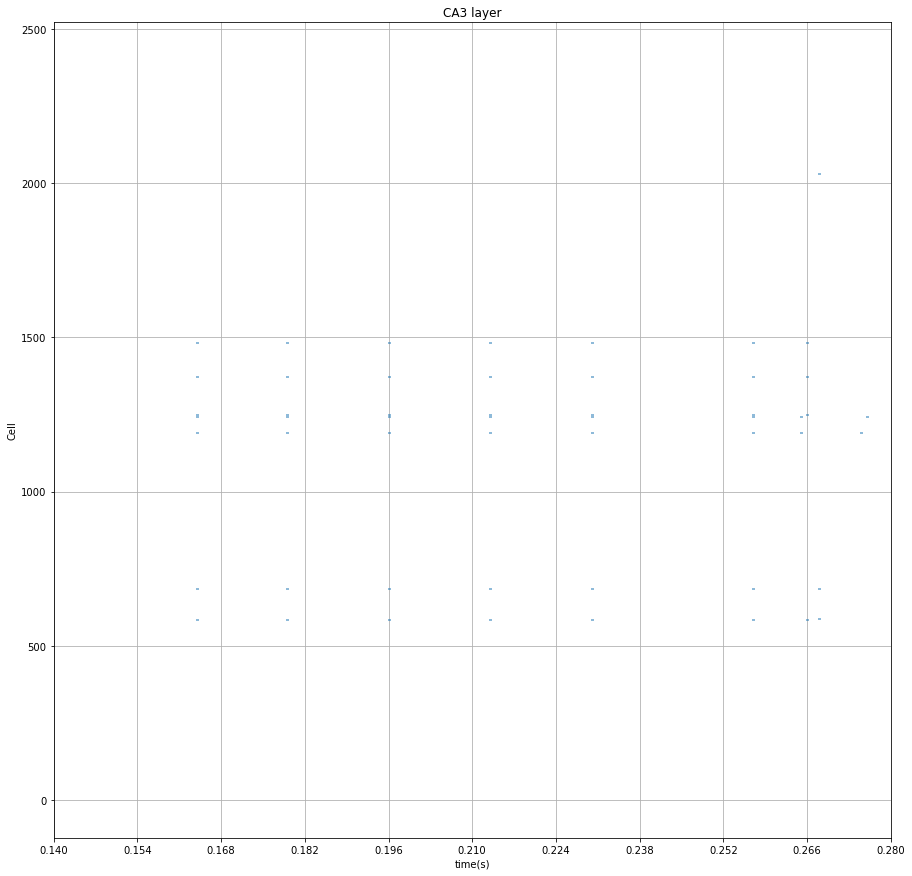

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


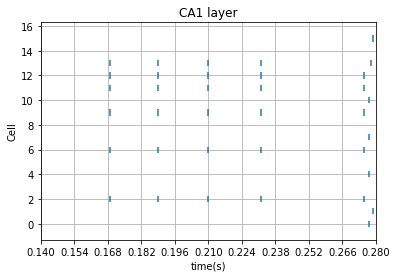

Ret1 :  {1281, 1251, 357, 1991, 1192, 585, 425, 1547, 588, 1484, 686, 2031, 2376, 2380, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1281, 1251, 1991, 425, 2380, 588, 2031, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


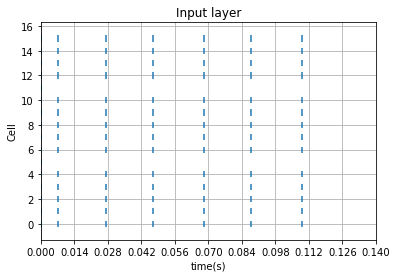

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  2  3  4  8  9 13]


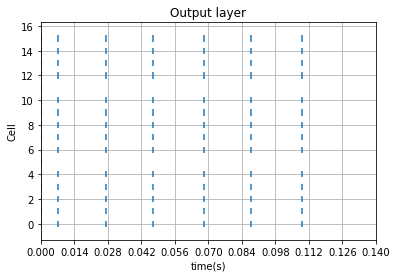

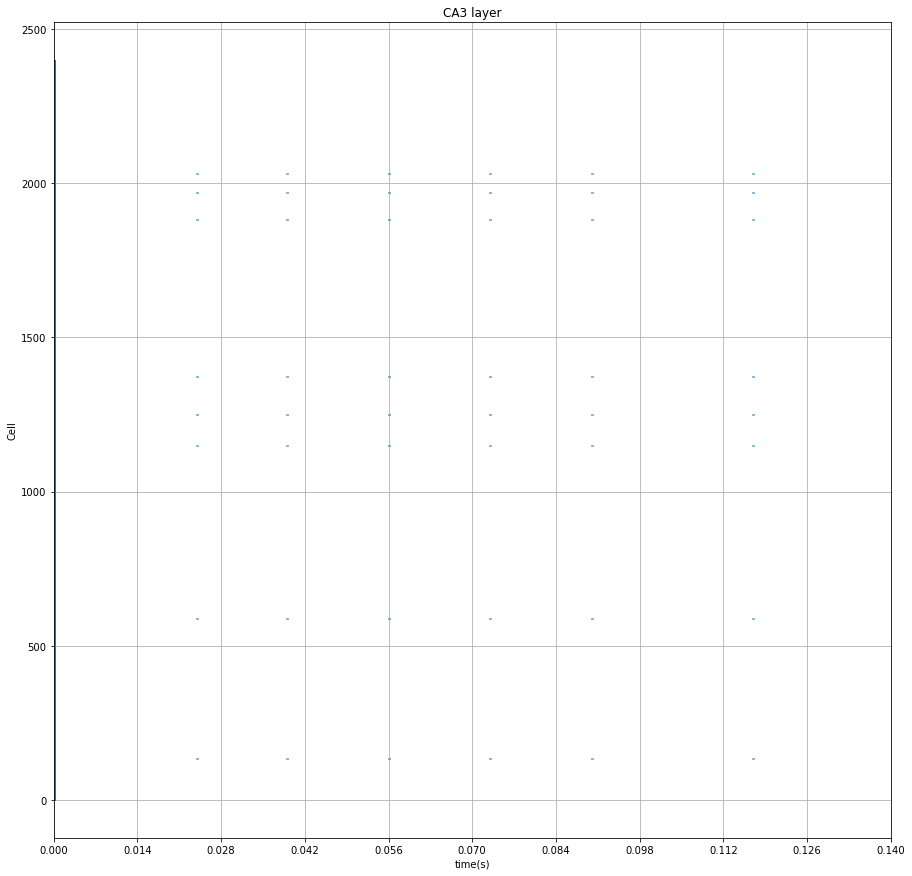

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [1547, 2192, 1561, 1192, 1991, 1357, 2380, 463, 473, 2138, 1247, 1374, 1251, 748]


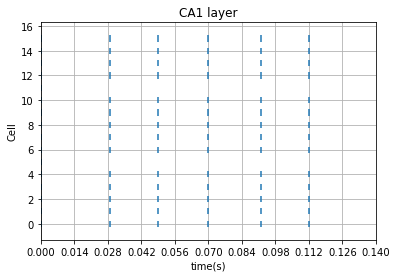

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


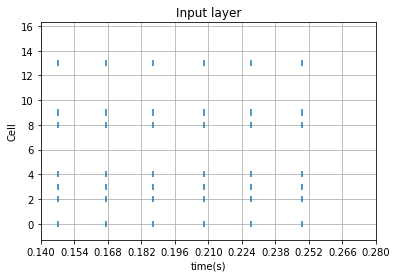

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 0  2  3  4  8  9 13]


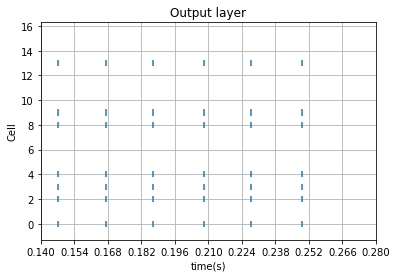

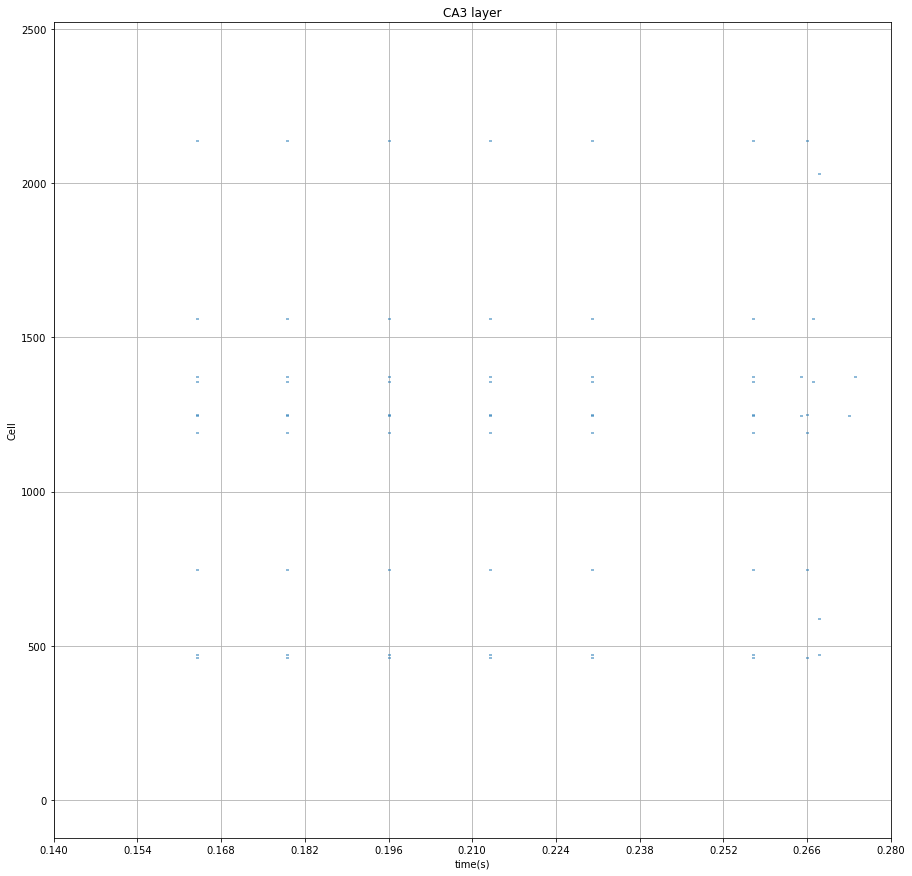

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [1547, 2192, 1561, 1192, 1991, 1357, 2380, 463, 473, 2138, 1247, 1374, 1251, 748]


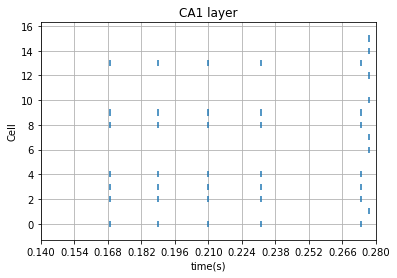

Ret1 :  {1281, 1251, 1991, 1192, 425, 1547, 748, 588, 1357, 463, 1561, 2031, 2192, 2380, 473, 2138, 1374, 1247}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1281, 1251, 1991, 425, 2380, 588, 2031, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


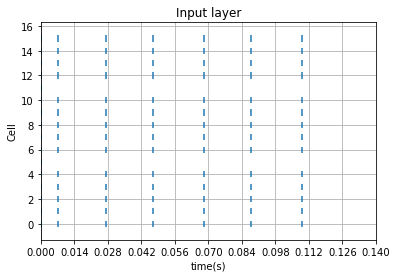

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 2  4  8  9 11 12 13]


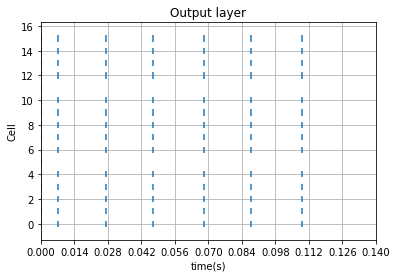

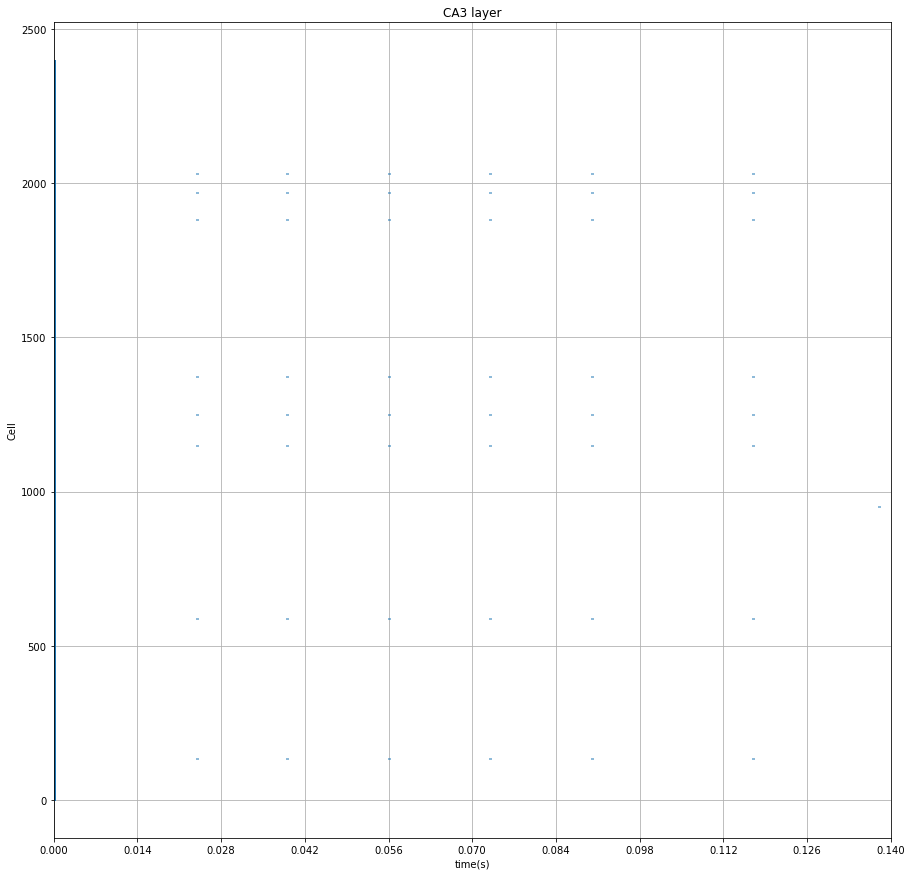

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


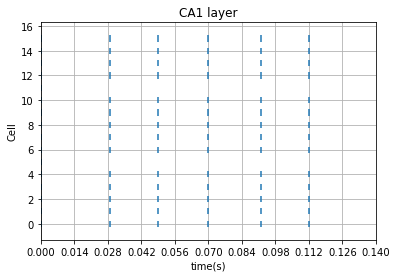

Ret1 :  {1281, 1374, 1251, 134, 1991, 425, 2266, 588, 2380, 2031, 1969, 658, 951, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 273 [1374]
0 279 [1882]


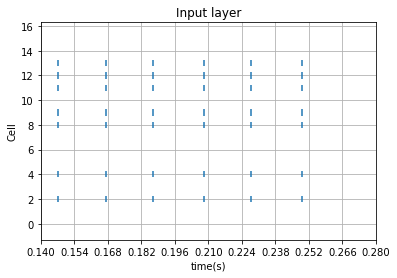

0 :  [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15]
1 :  [ 2  4  8  9 11 12 13]


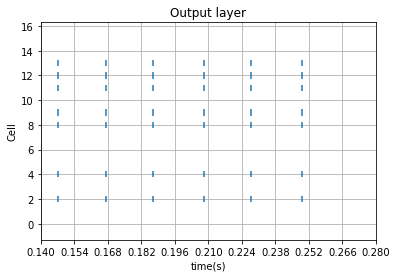

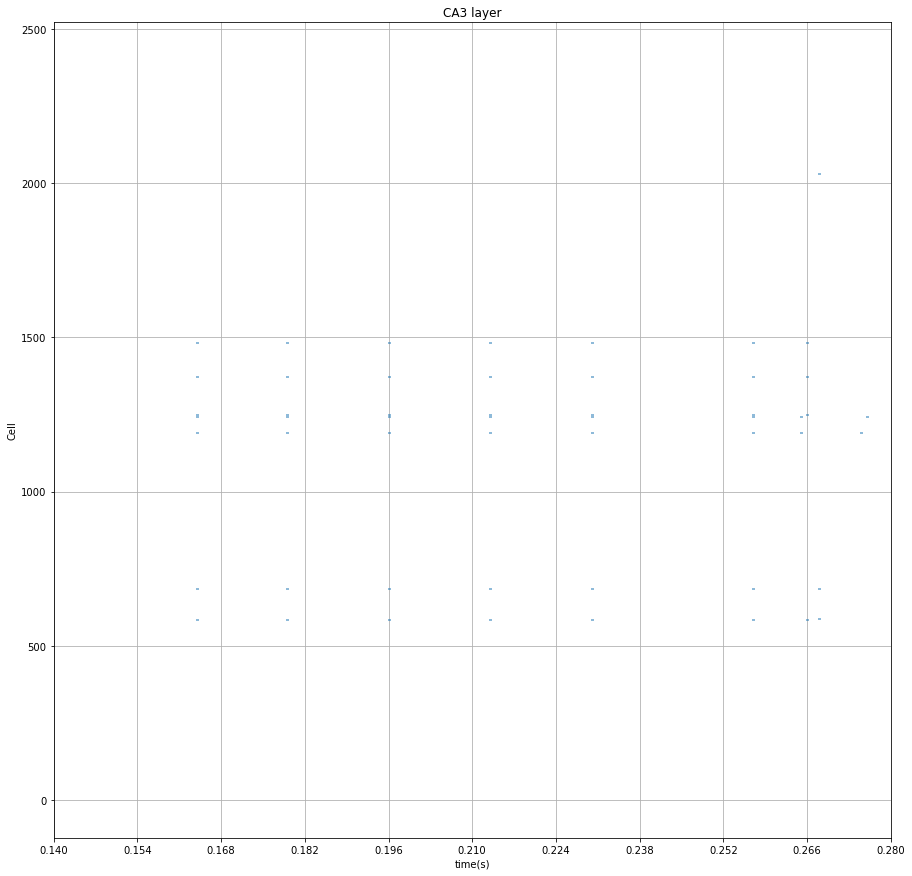

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


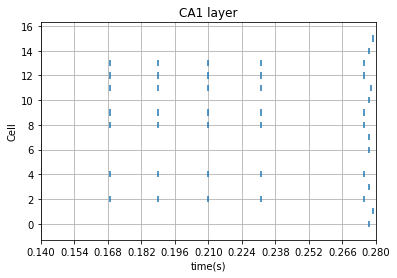

Ret1 :  {1281, 1251, 357, 1991, 1192, 585, 425, 1547, 588, 1484, 686, 2031, 2376, 2380, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1281, 1251, 1991, 425, 2380, 588, 2031, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


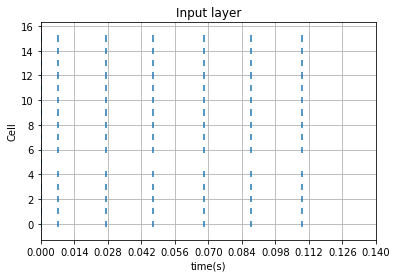

0 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15]
1 :  [ 2  3  6  7  8  9 10 12 15]


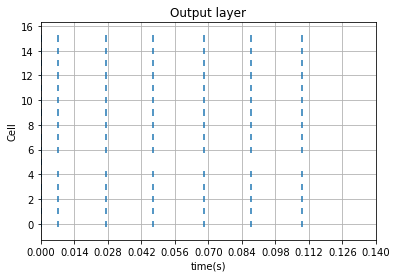

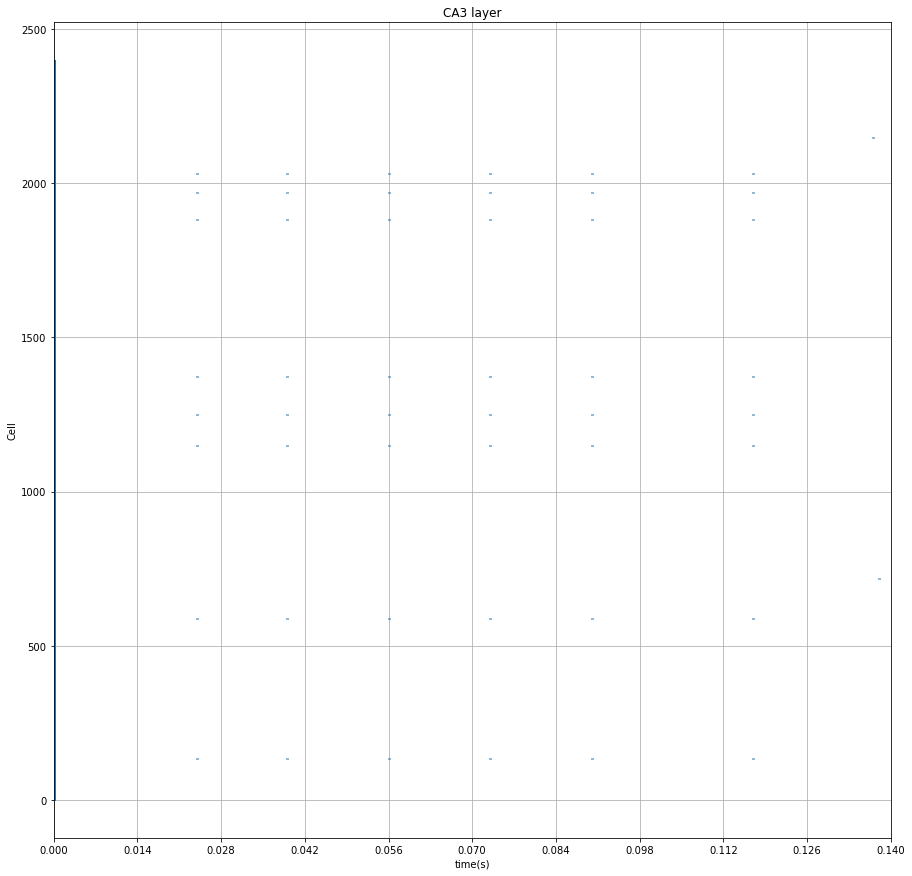

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


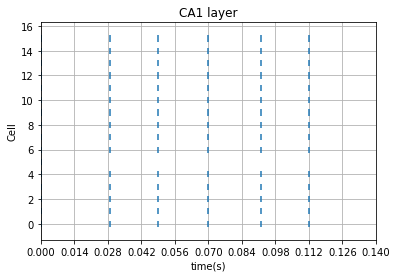

Ret1 :  {1281, 1374, 1251, 2148, 134, 1991, 425, 2266, 588, 2380, 718, 2031, 1969, 658, 2001, 1882, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------


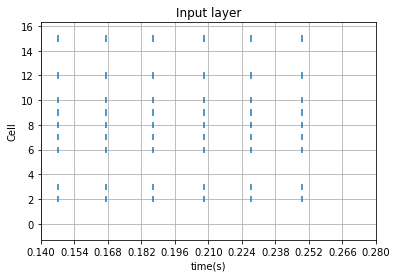

0 :  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15]
1 :  [ 2  3  6  7  8  9 10 12 15]


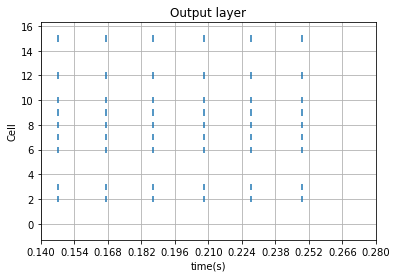

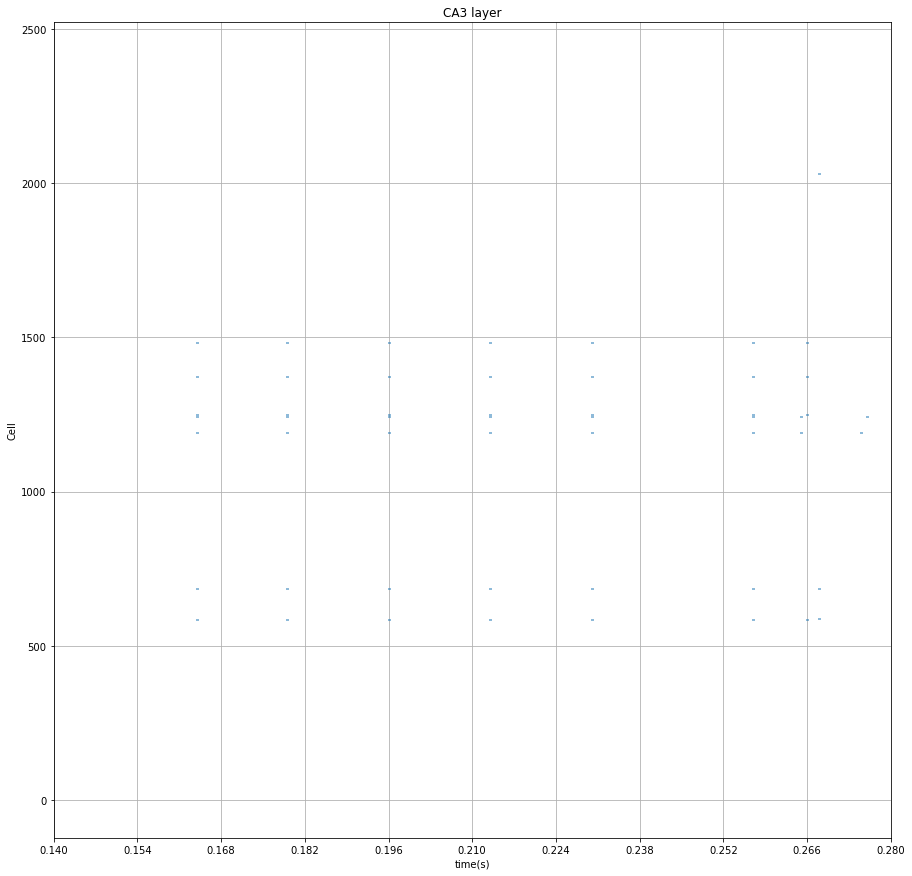

0 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]
1 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]


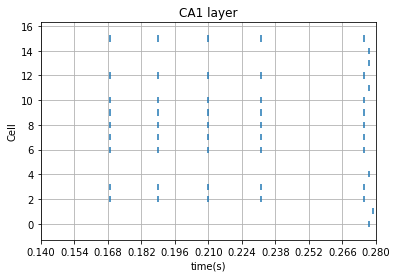

Ret1 :  {1281, 1251, 357, 1991, 1192, 585, 425, 1547, 588, 1484, 686, 2031, 2376, 2380, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1281, 1251, 1991, 425, 2380, 588, 2031, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


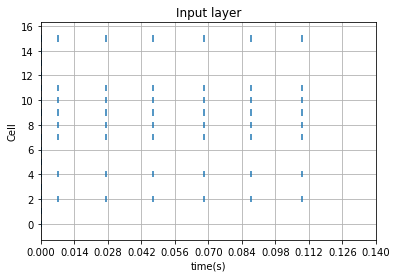

0 :  [ 2  4  7  8  9 10 11 15]
1 :  [ 0  1  2  4  6  7  8  9 11 12 13 14 15]


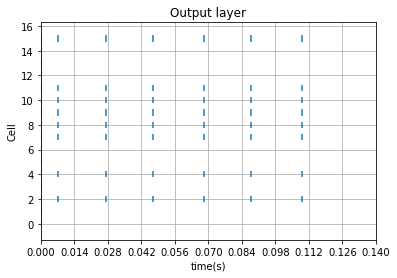

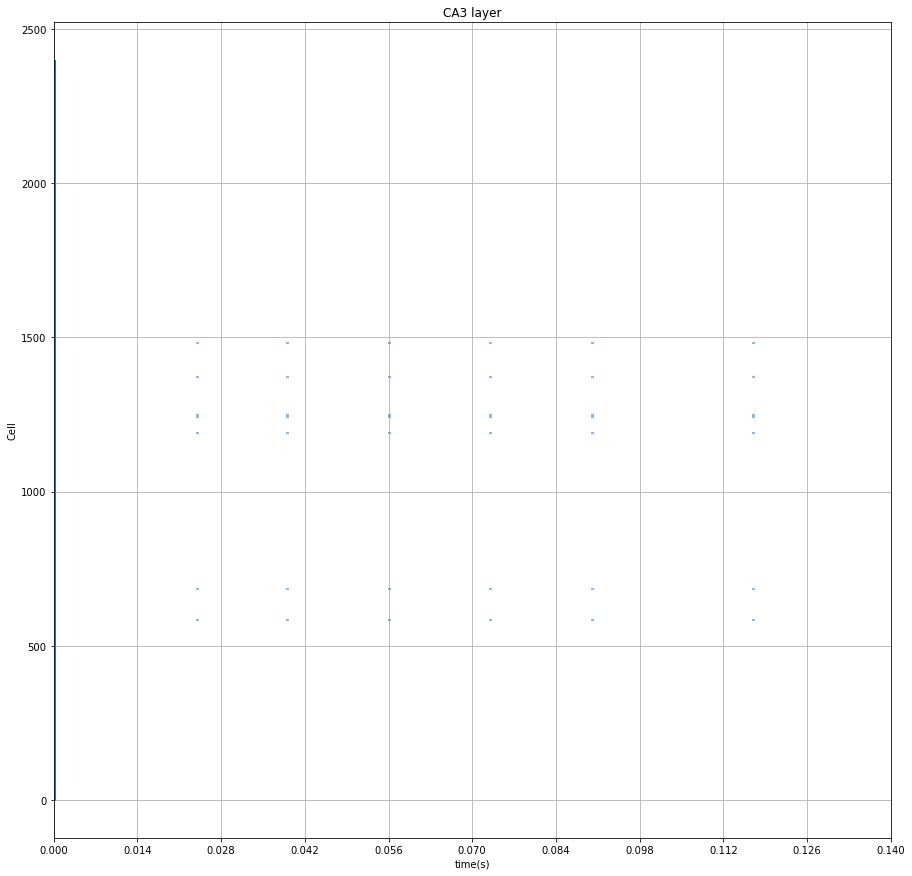

0 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
1 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]


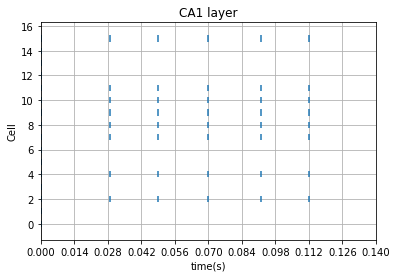

Ret1 :  {1251, 357, 1991, 1192, 585, 2376, 1547, 1484, 2380, 686, 1244, 509, 1374}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  set()
---------------------------------------------------------------------------------
0 267 [1192]


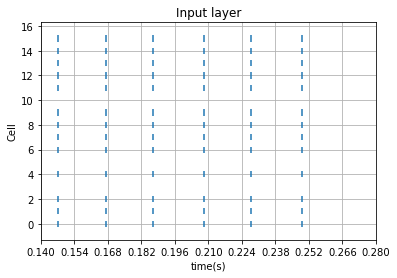

0 :  [ 2  4  7  8  9 10 11 15]
1 :  [ 0  1  2  4  6  7  8  9 11 12 13 14 15]


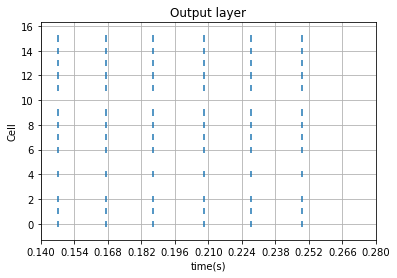

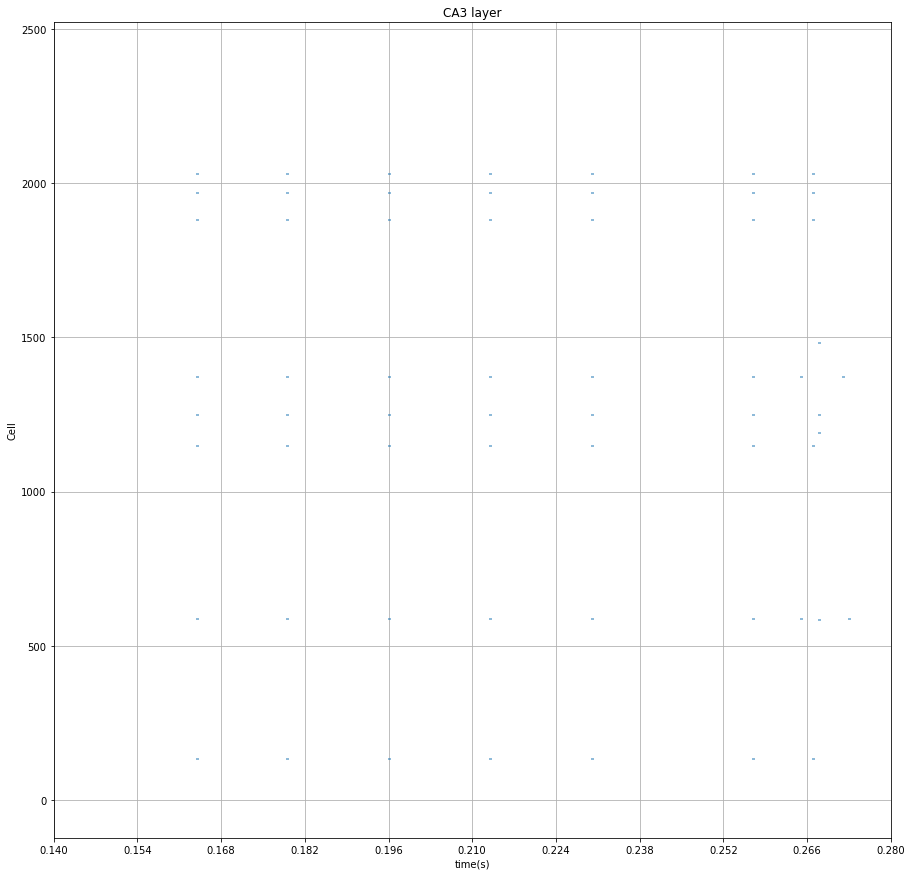

0 :  [509, 1991, 2376, 585, 1547, 1484, 2380, 1244, 1374, 1251, 357, 1192, 686]
1 :  [1281, 134, 658, 425, 1969, 1991, 2380, 588, 1882, 1374, 2266, 1251, 2031, 1150]


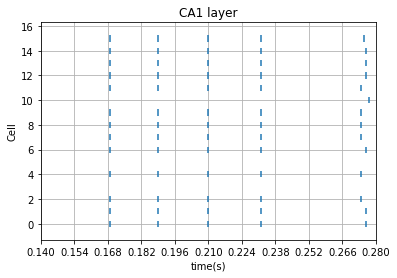

Ret1 :  {1281, 1374, 1251, 134, 1991, 1192, 585, 425, 2266, 588, 1484, 2380, 2031, 1969, 658, 1882, 509, 1150}
Ret2 :  set()
Ret3 :  set()
Rc :  set()
intersection with 5 :  {1251, 1991, 1192, 585, 1484, 2380, 509, 1374}
---------------------------------------------------------------------------------
Success :  0
Fail :  2
If_fail :  0
Output bias (mean, std) :  0.0 0.0


In [13]:
# Learning
for Trial in range(30):
    Trial = Trial
    Tar = (Trial // 5) + 1
    Try = Trial % 5
    
    # initiation
    En_win = 120
    Re_win = 120
    
    Num_tar = len(Target_Data[Trial])
    Num_cue = 1
    Repeat = 1
    
    EtoI_learning = True
    already_learned = False
    learned_weights = [0,0,0,0]
    Direct_pp = True
    
    Target = Target_Data[Trial]
    Cue = np.zeros(params.N_I)

    network, Fail, If_fail, Success, Winfin, Voltage, FT, CA3_R_list, Out_R_list = Operate_model.run_model(
        En_win, Re_win, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Filt_gdata, Af_py, Af_in)
    
    if not already_learned:
        with open('Learned weights-overlap_v4%d-%d.pkl' % (Tar, Try), 'wb') as file:
            pickle.dump(network.q_ppCA3, file)
            pickle.dump(network.q_Rc, file)
            pickle.dump(network.q_CA33i, file)
            pickle.dump(network.q_Sc, file)

In [ ]:
# Retrieval
for Trial in range(6*5):
    Tar = (Trial // 5) + 1
    Try = Trial % 5
    
    # initiation
    En_win = 120
    Re_win = 120
    
    # 현 trial에서 cue의 개수
    Num_tar = len(Target_Data[Trial])
    Num_cue = 1
    Repeat = 100
    
    Phase_num = Num_cue*Repeat
    
    # target : 2x25 / P_Data : 16x25
    Target = Target_Data[Trial]
    Cue = Cue_Data[:,Trial]

    EtoI_learning = True
    already_learned = True
    Direct_pp = True
     
    if already_learned:
        with open(learned_path+'//Learned weights-overlap_v2%d-%d.pkl' % (Tar, Try), 'rb') as file:
            q_ppCA3 = pickle.load(file)   
            q_Rc = pickle.load(file)
            q_CA33i = pickle.load(file)
            q_Sc = pickle.load(file)

        if not EtoI_learning:
            for n in range(params.N_CA3):
                for m in range(params.N_CA3i):
                    if q_CA33i[n,m] !=0:
                        q_CA33i[n,m] = 0.5
        learned_weights = [q_ppCA3, q_Rc, q_CA33i, q_Sc]
    else:
        learned_weights = [0,0,0,0]

    network, Fail, If_fail, Success, Winfin, CA3_R_list, CA1_R_list = Operate_model_v3.run_model(
        En_win, Re_win, 
        Num_tar, Num_cue, Repeat, Target, Cue, 
        WTS, params, 
        already_learned, learned_weights, Direct_pp,
        Filt_idata, Filt_gdata, Af_py, Af_in)
    
    with open('Results-overlapM_v2%d-%d.pkl' % (Tar, Try), 'wb') as file:
        pickle.dump(CA3_R_list, file)
        pickle.dump(CA1_R_list, file)